# E-commerce site clients segmentation

# Content
- [Unpickling dataframes](#Unpickling-dataframes)
- [Automatic segmentation](#Automatic-segmentation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

## Unpickling dataframe

After we pickled the dataframe, we have to unpickle it.

In [2]:
# To unpickle the dataframe

new_df_for_segmentation_analysis = pd.read_pickle("./pickle_data_automatic_segmentation.pkl")
rfm_new_df_for_automatic_segmentation = pd.read_pickle("./pickle_data_RFM_segmentation.pkl")

## Automatic segmentation

In [3]:
automatic_segmentation_df = new_df_for_segmentation_analysis.copy()

In [4]:
automatic_segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 115298
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   customer_unique_id                              91231 non-null  object 
 1   median_review_score                             91231 non-null  float64
 2   median_order_total_number_of_items              91231 non-null  float64
 3   median_number_of_orders_for_a_customer          91231 non-null  float64
 4   median_payment_value                            91231 non-null  float64
 5   median_appliances_products_per_customer         91231 non-null  float64
 6   median_of_arts_products_per_customer            91231 non-null  float64
 7   median_of_auto_products_per_customer            91231 non-null  float64
 8   median_of_construction_products_per_customer    91231 non-null  float64
 9   median_of_electronics_products_per_cus

We will eliminate information containing some identifiers such as the product, order and customer. We will eliminate the customer_zip_code_prefix because we will keep the customer city and state. 

We will also eliminate the variables median_number_of_orders_for_a_customer and median_payment_value because we will merge the present dataframe with the one created for the RFM analysis and we will keep the Recency, Frequency and Monetary_value features.

In [5]:
automatic_segmentation_df.columns

Index(['customer_unique_id', 'median_review_score',
       'median_order_total_number_of_items',
       'median_number_of_orders_for_a_customer', 'median_payment_value',
       'median_appliances_products_per_customer',
       'median_of_arts_products_per_customer',
       'median_of_auto_products_per_customer',
       'median_of_construction_products_per_customer',
       'median_of_electronics_products_per_customer',
       'median_of_fashion_products_per_customer',
       'median_of_food_drinks_products_per_customer',
       'median_of_garden_pets_products_per_customer',
       'median_of_health_beauty_products_per_customer',
       'median_of_home_products_per_customer',
       'median_of_office_products_per_customer',
       'median_of_other_products_per_customer',
       'median_of_sports_leisure_products_per_customer', 'order_id',
       'payment_type', 'zip_code_prefix', 'median_geolocation_lat',
       'median_geolocation_lng', 'customer_city', 'customer_state',
       'order_

In [6]:
automatic_segmentation_df = automatic_segmentation_df.drop(columns=[
                                                                    'median_number_of_orders_for_a_customer',
                                                                    'median_payment_value',
                                                                    'order_id',
                                                                    'payment_type', 
                                                                    'zip_code_prefix', 
                                                                    'median_geolocation_lat',
                                                                    'median_geolocation_lng', 
                                                                    'customer_city', 
                                                                    'customer_state',
                                                                    'order_purchase_timestamp', 
                                                                    'order_delivered_customer_date',
                                                                    'product_category_name_english'
                                                                    ])

In [7]:
automatic_segmentation_new_df = automatic_segmentation_df.copy()

In [8]:
automatic_segmentation_new_df = pd.merge(automatic_segmentation_df, rfm_new_df_for_automatic_segmentation, on='customer_unique_id')

In [9]:
automatic_segmentation_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 91230
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   customer_unique_id                              91231 non-null  object 
 1   median_review_score                             91231 non-null  float64
 2   median_order_total_number_of_items              91231 non-null  float64
 3   median_appliances_products_per_customer         91231 non-null  float64
 4   median_of_arts_products_per_customer            91231 non-null  float64
 5   median_of_auto_products_per_customer            91231 non-null  float64
 6   median_of_construction_products_per_customer    91231 non-null  float64
 7   median_of_electronics_products_per_customer     91231 non-null  float64
 8   median_of_fashion_products_per_customer         91231 non-null  float64
 9   median_of_food_drinks_products_per_cust

We will eliminate the customer_unique_id, the RFM scores and the segment name in order to perform the clusterization from customers behavior.

In [10]:
automatic_segmentation_new_df = automatic_segmentation_new_df.drop(columns=['customer_unique_id'
                                                                ])

In [11]:
automatic_segmentation_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 91230
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   median_review_score                             91231 non-null  float64
 1   median_order_total_number_of_items              91231 non-null  float64
 2   median_appliances_products_per_customer         91231 non-null  float64
 3   median_of_arts_products_per_customer            91231 non-null  float64
 4   median_of_auto_products_per_customer            91231 non-null  float64
 5   median_of_construction_products_per_customer    91231 non-null  float64
 6   median_of_electronics_products_per_customer     91231 non-null  float64
 7   median_of_fashion_products_per_customer         91231 non-null  float64
 8   median_of_food_drinks_products_per_customer     91231 non-null  float64
 9   median_of_garden_pets_products_per_cust

### Feature transformation and standardization for outlier detection 

#### Log-transform for skewed distributions

We are going to apply a logaritmic transformation to the variables that are more asymmetrical from our data. Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data.

See references: 

* https://www.sciencedirect.com/topics/computer-science/log-transformation#:~:text=Log%20transformation%20also%20de%2Demphasizes,restore%20symmetry%20to%20the%20data.&text=If%20the%20distance%20between%20each,the%20variable%20skews%20the%20distance
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

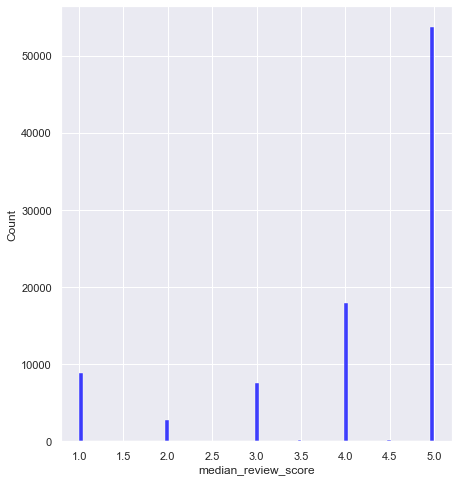

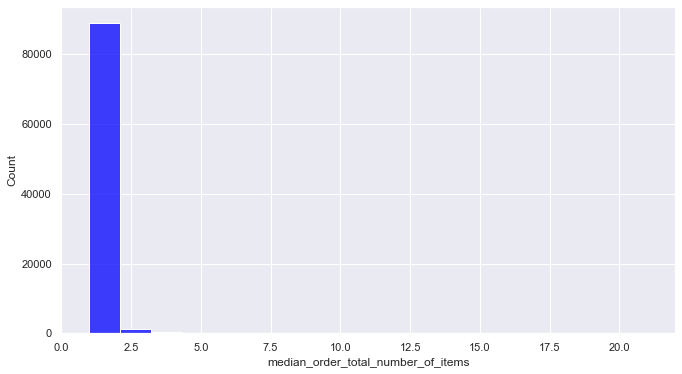

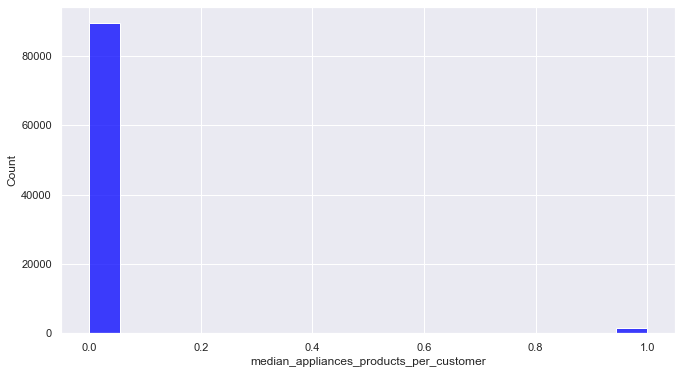

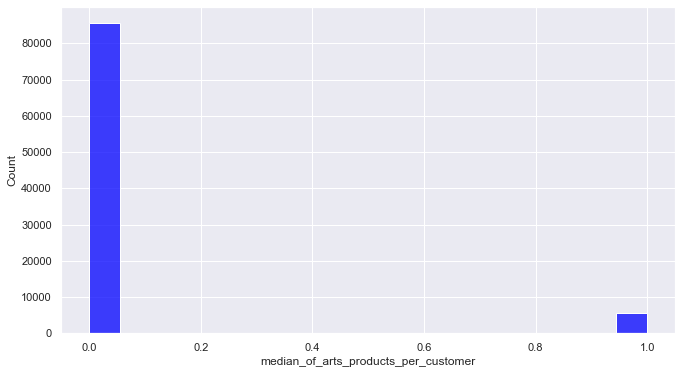

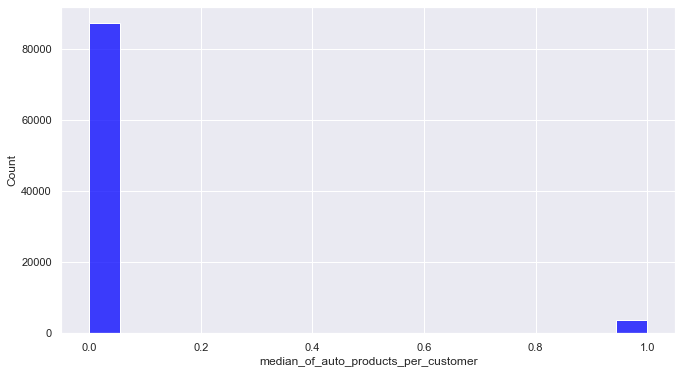

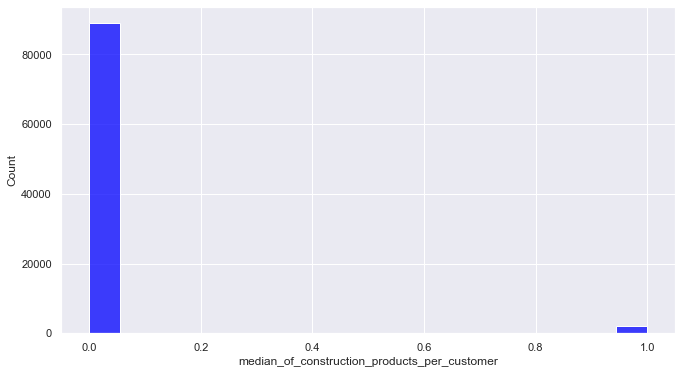

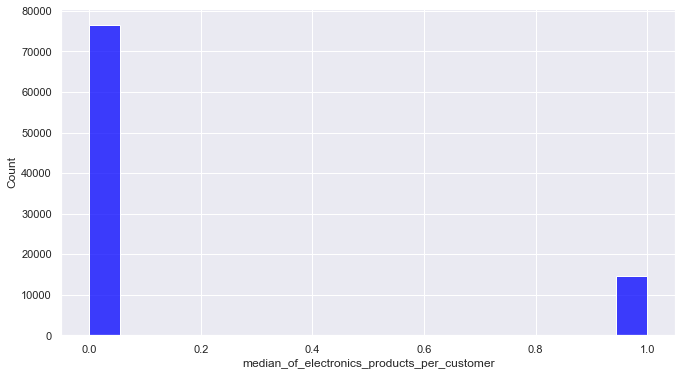

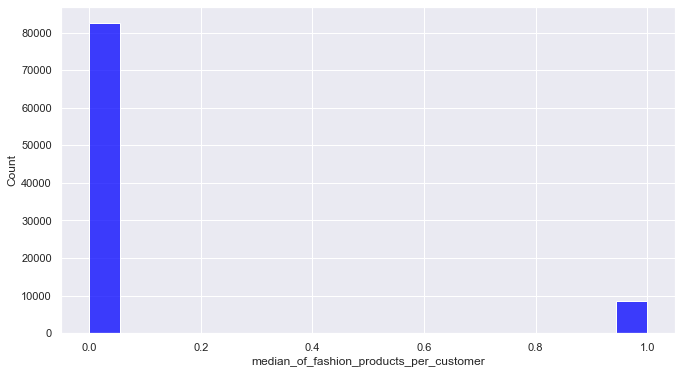

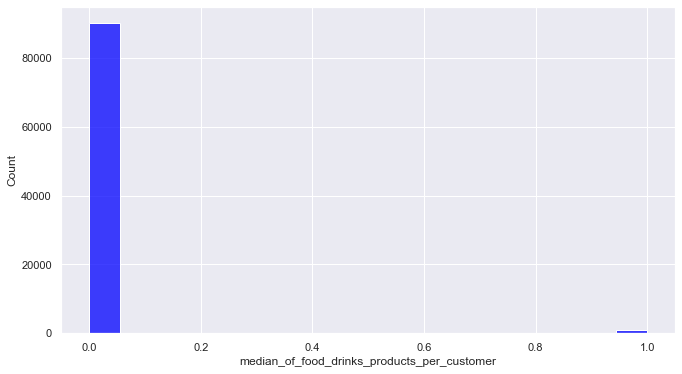

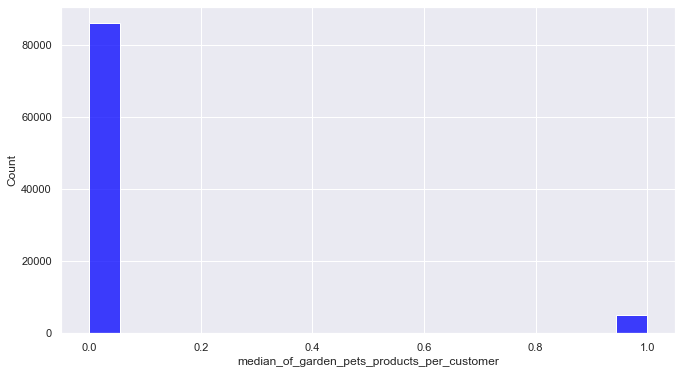

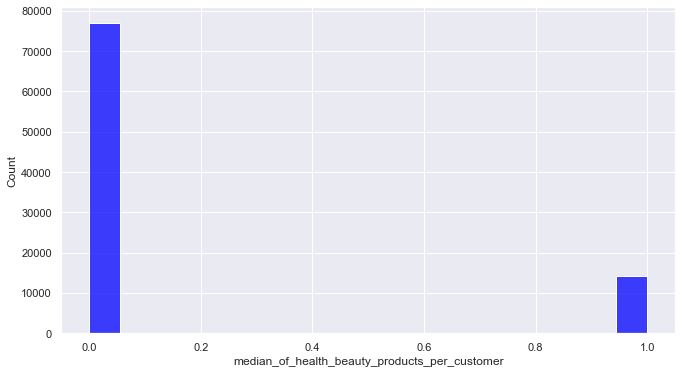

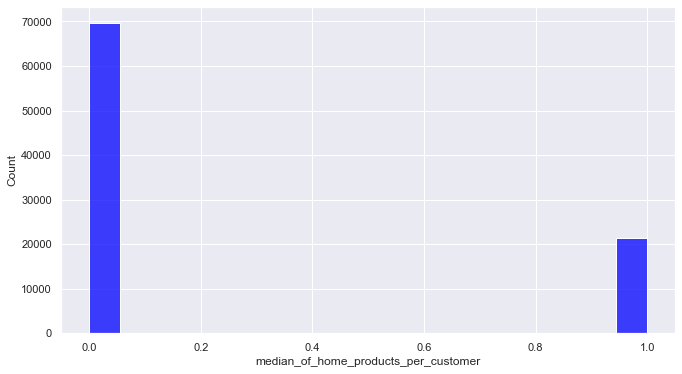

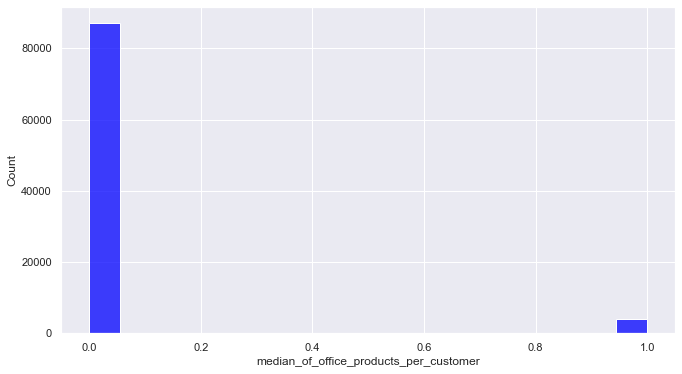

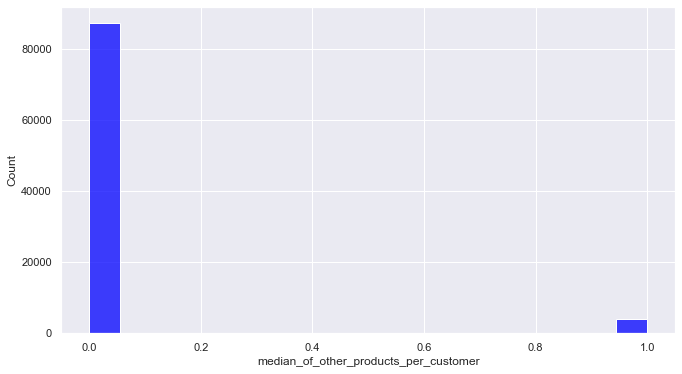

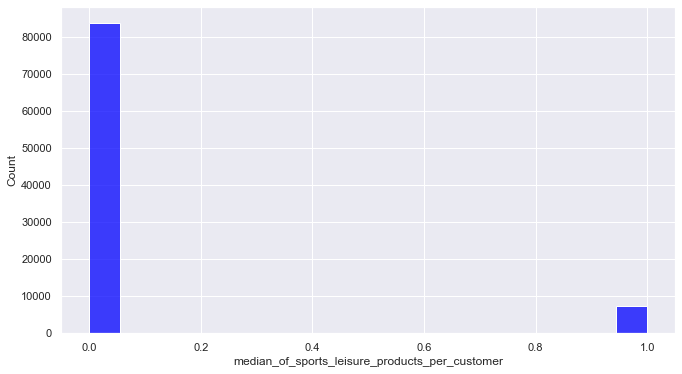

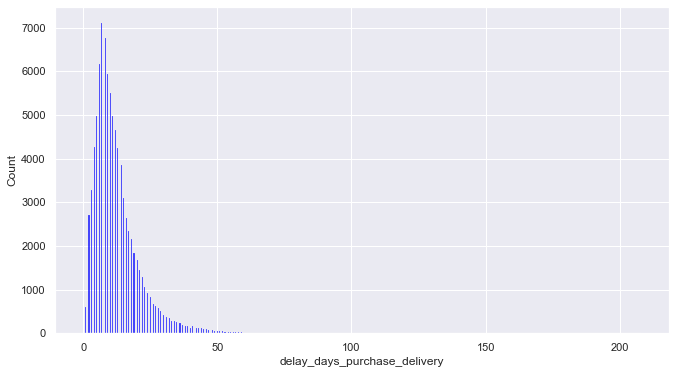

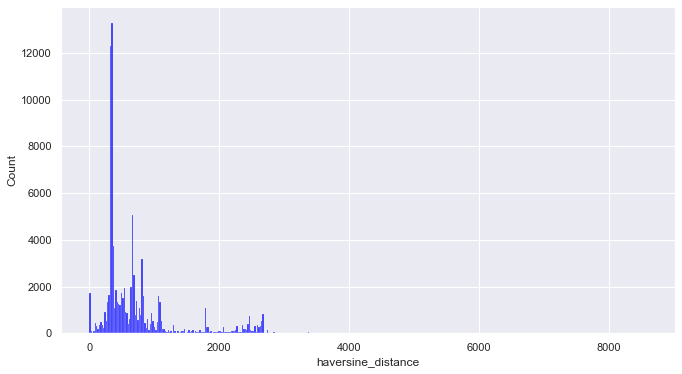

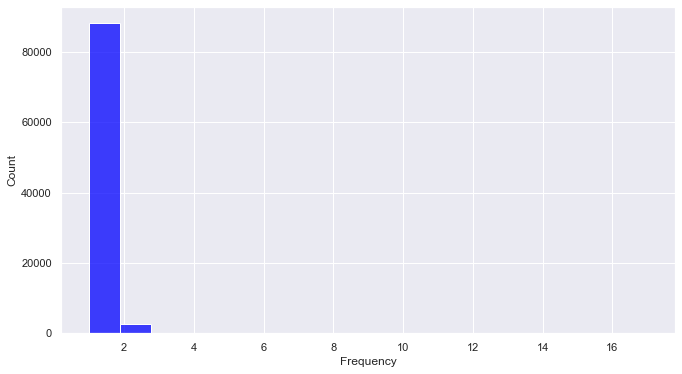

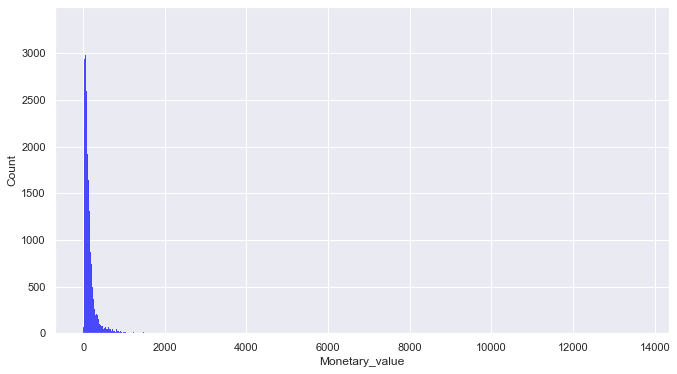

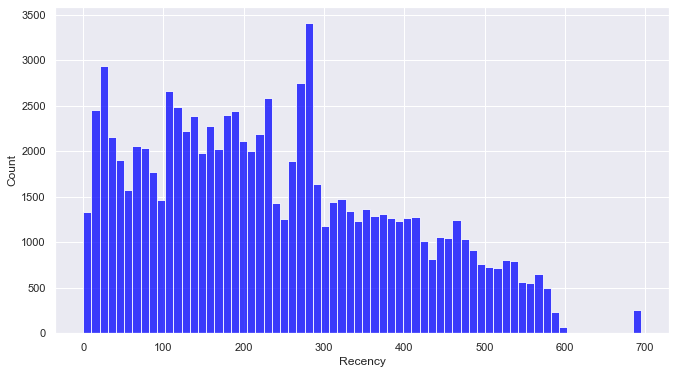

In [12]:
plt.subplots(figsize=(7, 8))

columns_histogram = automatic_segmentation_new_df.columns.tolist()
columns_histogram.remove('Segment_name')

for i in columns_histogram:
    sns.histplot(data = automatic_segmentation_new_df, x=i, color="blue")
    plt.show()

In [13]:
df_log_transformed = automatic_segmentation_new_df.copy()

In [14]:
columns_for_log_transformation = ['median_order_total_number_of_items',
                                    'Frequency',
                                    'Monetary_value',
                                    'delay_days_purchase_delivery',
                                    'olist_office_customer_distance'
                                    ]

In [15]:
for col in df_log_transformed.columns:
    if col in columns_for_log_transformation:
        df_log_transformed[col] = np.log10(df_log_transformed[col] + 0.1) 

In [16]:
# columns_histogram = df_log_transformed.columns.tolist()
# columns_histogram.remove('Segment_name')

# plt.subplots(figsize=(7, 8))
# for i in columns_histogram:
#     sns.histplot(data=df_log_transformed, x=i, color="blue")
#     plt.show()

#### Z-scores standardization

We are going to use Z-scores to detect outliers in our data, and to standardize it. See references: 

* https://www.mygreatlearning.com/blog/outlier-analysis-explained/
* https://www.codecademy.com/article/normalization
* https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/

In [17]:
df_for_z_scores = df_log_transformed.copy()

In [18]:
columns_for_z_scores = df_for_z_scores.columns.tolist()
columns_for_z_scores.remove('Segment_name')

for col in df_for_z_scores.columns:
    if col in columns_for_z_scores:
        # standardize data
        df_for_z_scores[col] = (df_for_z_scores[col] - df_for_z_scores[col].mean()) / df_for_z_scores[col].std()

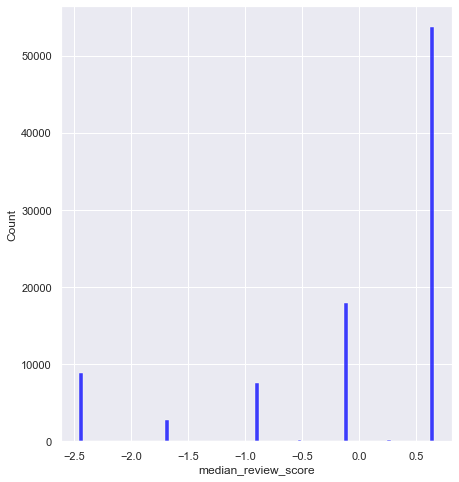

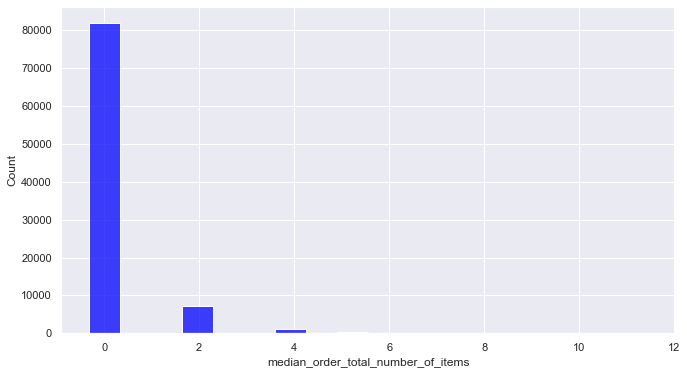

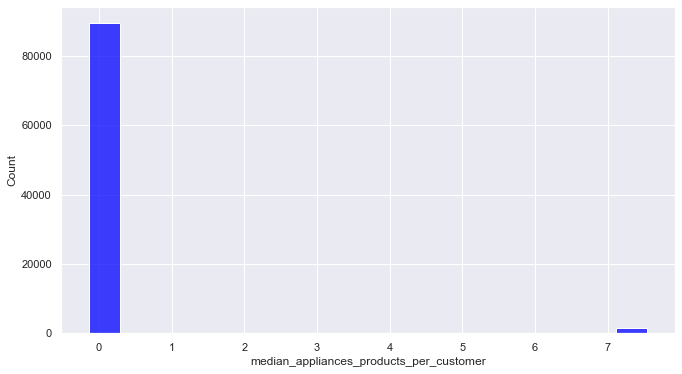

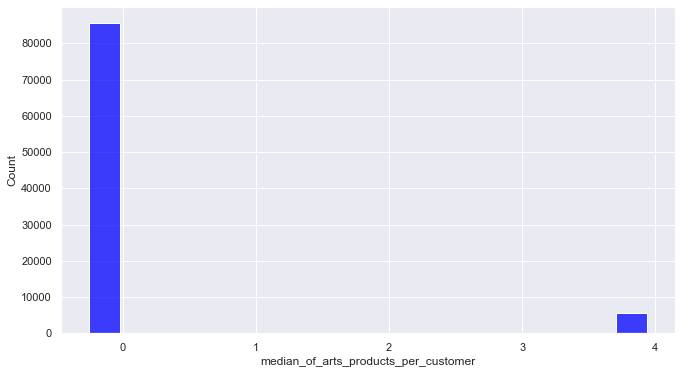

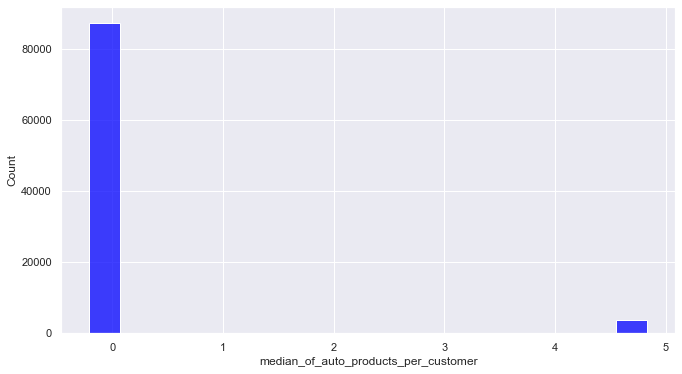

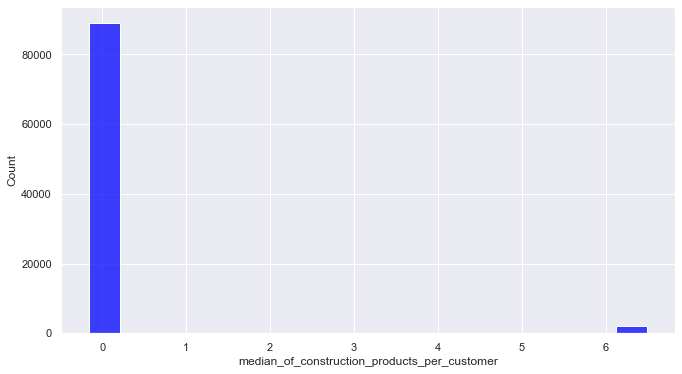

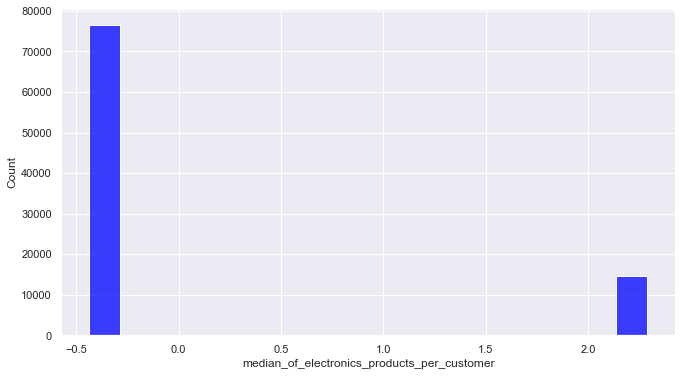

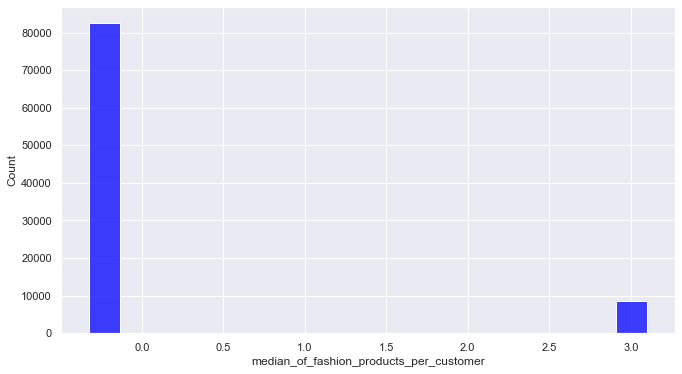

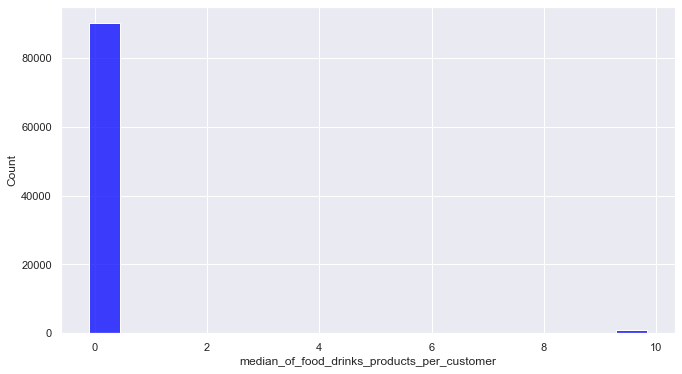

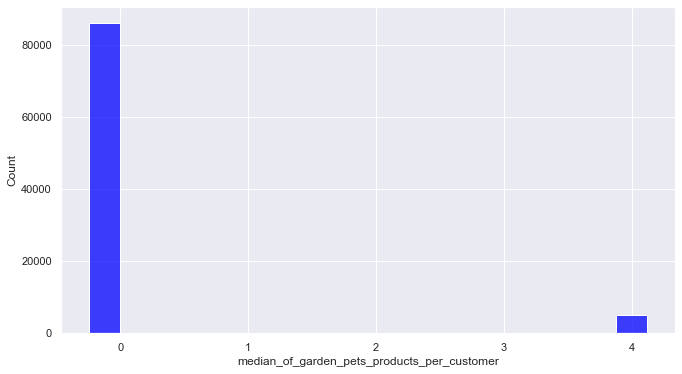

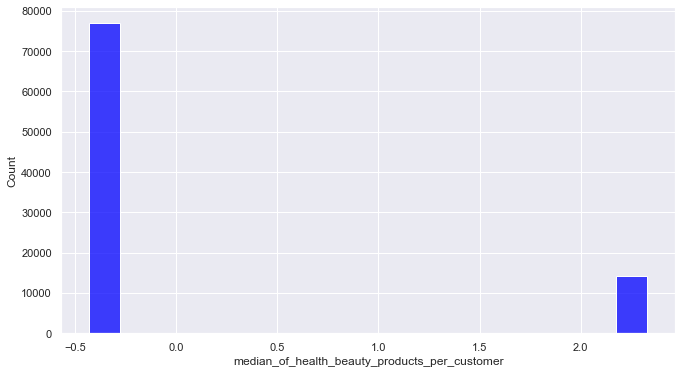

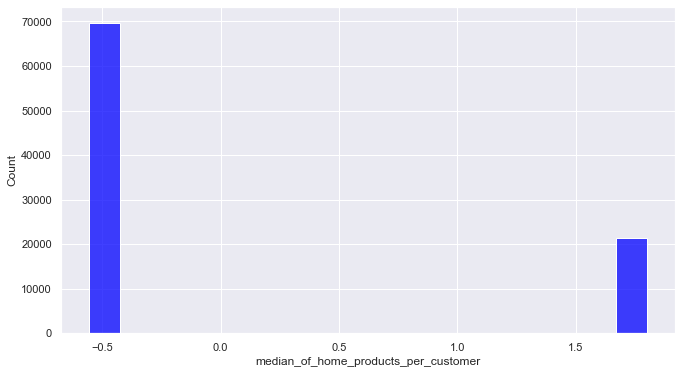

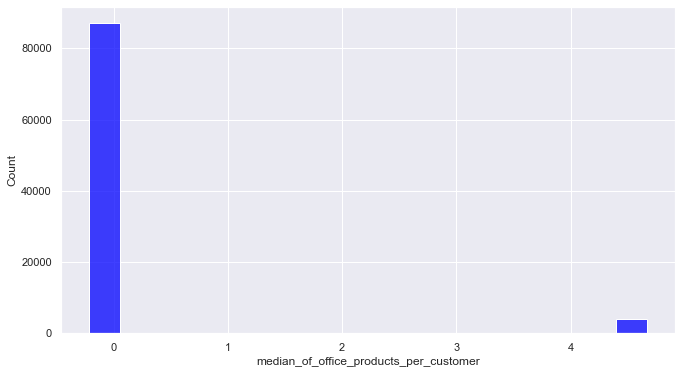

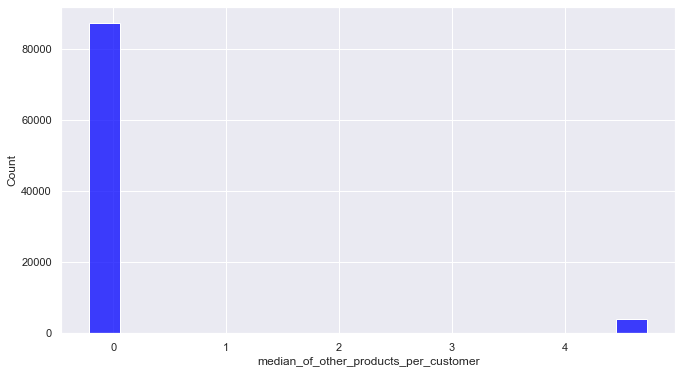

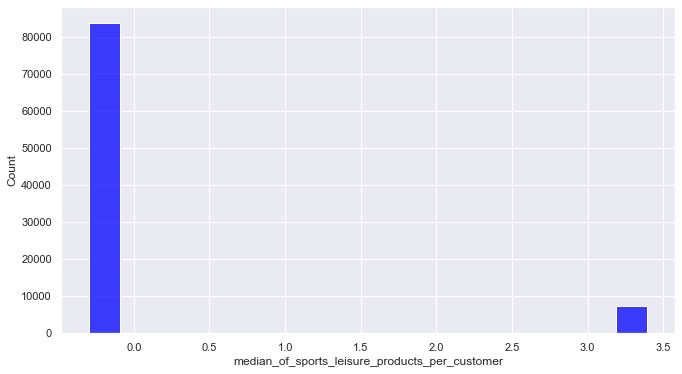

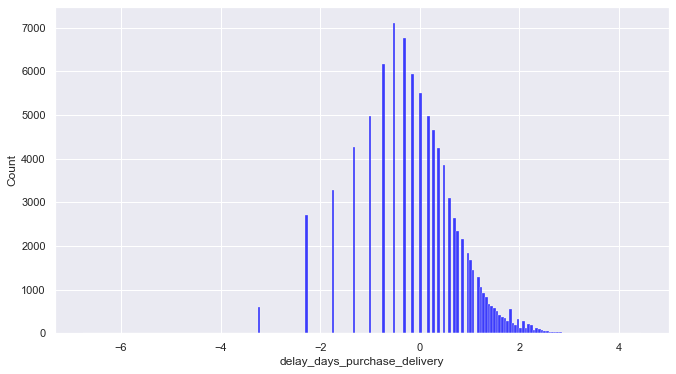

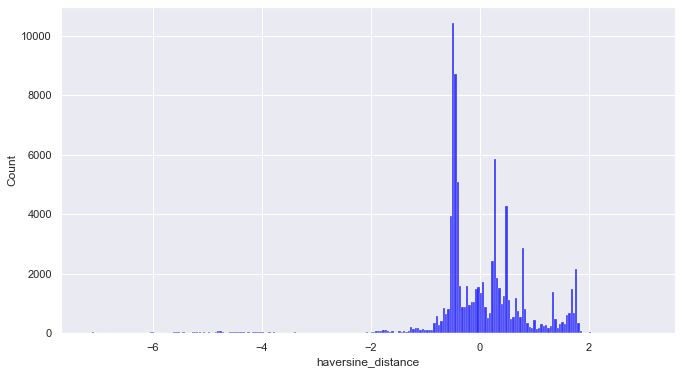

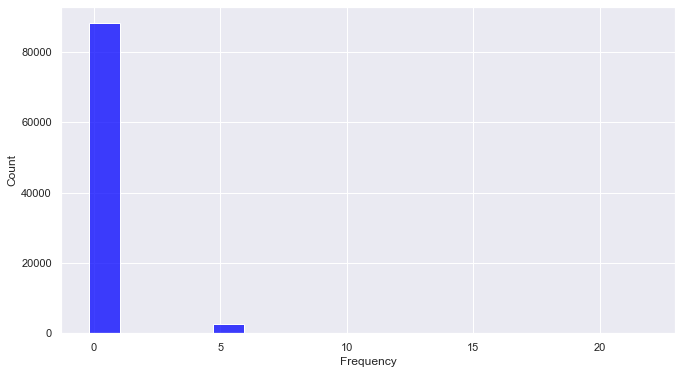

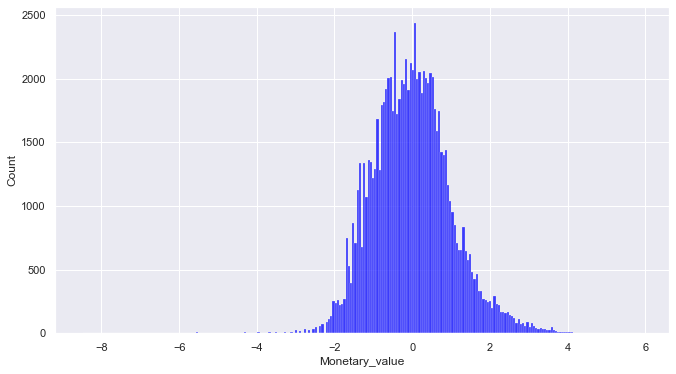

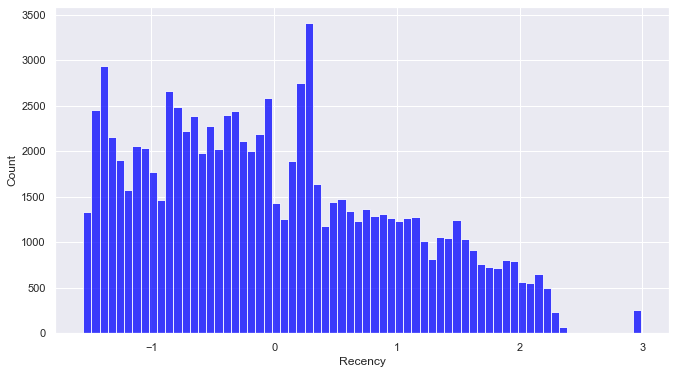

In [19]:
columns_histogram = df_for_z_scores.columns.tolist()
columns_histogram.remove('Segment_name')

plt.subplots(figsize=(7, 8))
for i in columns_histogram:
    sns.histplot(data=df_for_z_scores, x=i, color="blue")
    plt.show()

In [20]:
df_standardized = df_for_z_scores.copy()

In [21]:
df_standardized_without_outliers = df_standardized.loc[
                                                    (df_standardized['median_order_total_number_of_items'] >= -4) & (df_standardized['median_order_total_number_of_items'] <= 4)
                                                    & (df_standardized['Frequency'] >= -5) & (df_standardized['Frequency'] <= 5)
                                                    & (df_standardized['Monetary_value'] >= -4) & (df_standardized['Monetary_value'] <= 4)
                                                    & (df_standardized['Recency'] >= -4) & (df_standardized['Recency'] <= 4)
                                                    & (df_standardized['delay_days_purchase_delivery'] >= -4) & (df_standardized['delay_days_purchase_delivery'] <= 4)
                                                    & (df_standardized['olist_office_customer_distance'] >= -3) & (df_standardized['olist_office_customer_distance'] <= 3)]

In [22]:
df_standardized_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85622 entries, 0 to 91229
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   median_review_score                             85622 non-null  float64
 1   median_order_total_number_of_items              85622 non-null  float64
 2   median_appliances_products_per_customer         85622 non-null  float64
 3   median_of_arts_products_per_customer            85622 non-null  float64
 4   median_of_auto_products_per_customer            85622 non-null  float64
 5   median_of_construction_products_per_customer    85622 non-null  float64
 6   median_of_electronics_products_per_customer     85622 non-null  float64
 7   median_of_fashion_products_per_customer         85622 non-null  float64
 8   median_of_food_drinks_products_per_customer     85622 non-null  float64
 9   median_of_garden_pets_products_per_cust

In [23]:
# columns_histogram = df_standardized_without_outliers.columns.tolist()
# columns_histogram.remove('Segment_name')

# plt.subplots(figsize=(7, 8))
# for i in columns_histogram:
#     sns.histplot(data=df_standardized_without_outliers, x=i, color="blue")
#     plt.show()

In [24]:
# df_standardized_without_outliers.columns

### PCA for dimensionality reduction

#### Case 1: We keep product_category_name_english and eliminate the median of product type per customer features

In the following case, we will explore the quality of clusters by keeping the product_category_name_english and eliminating the median of product type per customer features. We will keep a smaller number of features that might be easier to interpret.

In [25]:
df_for_PCA_case_one = df_standardized_without_outliers.copy()

In [26]:
df_for_PCA_case_one.columns

Index(['median_review_score', 'median_order_total_number_of_items',
       'median_appliances_products_per_customer',
       'median_of_arts_products_per_customer',
       'median_of_auto_products_per_customer',
       'median_of_construction_products_per_customer',
       'median_of_electronics_products_per_customer',
       'median_of_fashion_products_per_customer',
       'median_of_food_drinks_products_per_customer',
       'median_of_garden_pets_products_per_customer',
       'median_of_health_beauty_products_per_customer',
       'median_of_home_products_per_customer',
       'median_of_office_products_per_customer',
       'median_of_other_products_per_customer',
       'median_of_sports_leisure_products_per_customer',
       'delay_days_purchase_delivery', 'haversine_distance', 'Segment_name',
       'Frequency', 'Monetary_value', 'Recency'],
      dtype='object')

In [27]:
df_for_PCA_case_one = df_for_PCA_case_one.drop(columns=[
    'median_appliances_products_per_customer',
    'median_of_arts_products_per_customer',
    'median_of_auto_products_per_customer', 
    'median_of_construction_products_per_customer',
    'median_of_electronics_products_per_customer',
    'median_of_fashion_products_per_customer',
    'median_of_food_drinks_products_per_customer', 
    'median_of_garden_pets_products_per_customer', 
    'median_of_health_beauty_products_per_customer',
    'median_of_home_products_per_customer',
    'median_of_office_products_per_customer',
    'median_of_other_products_per_customer',
    'median_of_sports_leisure_products_per_customer'
])

In the present case, we keep 6 variables, from which we will not use the object type Segment_name variable.

In [28]:
df_for_PCA_case_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85622 entries, 0 to 91229
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   median_review_score                 85622 non-null  float64
 1   median_order_total_number_of_items  85622 non-null  float64
 2   delay_days_purchase_delivery        85622 non-null  float64
 3   haversine_distance                  85622 non-null  float64
 4   Segment_name                        85622 non-null  object 
 5   Frequency                           85622 non-null  float64
 6   Monetary_value                      85622 non-null  float64
 7   Recency                             85622 non-null  float64
dtypes: float64(7), object(1)
memory usage: 5.9+ MB


In [29]:
df_for_PCA_case_one.head()

median_review_score  median_order_total_number_of_items  \
0             0.660494                           -0.314543   
1            -0.119534                           -0.314543   
2            -0.899562                           -0.314543   
3            -0.119534                           -0.314543   
4             0.660494                           -0.314543   

   delay_days_purchase_delivery  haversine_distance      Segment_name  \
0                     -0.731098           -0.470234    About To Sleep   
1                     -1.724060           -0.514157    About To Sleep   
2                      1.401335           -0.838033  Recent customers   
3                      1.018144            1.790624  Recent customers   
4                      0.390129           -0.677719  Recent customers   

   Frequency  Monetary_value   Recency  
0   -0.17879        0.346429 -0.830536  
1   -0.17879       -1.666547 -0.810913  
2   -0.17879       -0.262229  1.955978  
3   -0.17879       -1.075013  0.543098  
4   -0.17879        0.743898  0.327241

The following two cells are functions extracted from the Open Classrooms documentation from the course "Réalisez une analyse exploratoire de données". They are avaibale in GitHub, as indicated in their corresponding links.

The next cell contains a function that draws the correlation circles. The following correlation circles visualize the correlation between the first four principal components and the original dataset features. In such correlations  are shown via coordinates.
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/ 

In [30]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_circles(components_pca, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            ax = plt.subplots(figsize=(10,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif components_pca.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(components_pca[d1,:]), max(components_pca[d1,:]), min(components_pca[d2,:]), max(components_pca[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if components_pca.shape[1] < 30 :
                plt.quiver(np.zeros(components_pca.shape[1]), np.zeros(components_pca.shape[1]),
                   components_pca[d1,:], components_pca[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in components_pca[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(components_pca[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation circle (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

The next cell contains a function that draws the projected data into the factorial planes for the first four principal components.

In [31]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            plt.figure(figsize=(10,8))
        
            # affichage des points
            if illustrative_var is None:
                sns.scatterplot(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    sns.scatterplot(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projected data (on F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            # plt.colorbar()

In [32]:
from sklearn.decomposition import PCA
features = df_for_PCA_case_one.drop(columns=['Segment_name']).columns
names = df_for_PCA_case_one.drop(columns=['Segment_name']).index


# PCA
pca_case_one = PCA(n_components=7) # We start with the total number of features
pca_result_case_one = pca_case_one.fit_transform(df_for_PCA_case_one.drop(columns=['Segment_name']).values)
pca_result_case_one

array([[-1.10852774e+00,  7.73868336e-01, -2.92503970e-01, ...,
        -3.59393078e-01,  2.90924838e-01,  2.72131461e-17],
       [-2.08332037e+00, -7.95852556e-02,  1.44819795e+00, ...,
        -8.05967289e-02, -2.90551851e-01,  2.72131461e-17],
       [ 1.54899524e+00, -1.74565093e+00,  1.02286368e-01, ...,
        -4.97044541e-01,  1.15906120e+00,  2.72131461e-17],
       ...,
       [ 1.44495590e+00, -5.50561534e-01,  2.60904448e-01, ...,
         5.09635064e-01, -3.61452830e-01,  2.72131461e-17],
       [ 9.37622405e-01, -1.89180390e+00, -1.31058544e+00, ...,
         1.93578943e-01, -7.70192785e-01,  2.72131461e-17],
       [-1.30600728e-01,  5.42540164e-01, -2.54675646e-01, ...,
         1.49740954e-01, -1.52296972e-01,  2.72131461e-17]])

In [33]:
pca_result_case_one.shape

(85622, 7)

The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array which contains the values of the percentage of variance explained by each of the selected components.

https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

In [34]:
(pca_case_one.explained_variance_ratio_ * 100).round(1)

array([28. , 20. , 18.4, 15.6, 10.6,  7.4,  0. ])

According to the previous result, the first component alone captures about 30.3% of the variability in the dataset. Then the second component alone captures about 27.7% of the variability in the dataset and so on. 

In [35]:
print("Variance explained by all 7 components = {:.2f}".format(sum(pca_case_one.explained_variance_ratio_ * 100)))

Variance explained by all 7 components = 100.00


Text(0, 0.5, 'Cumulative Explained Variance')

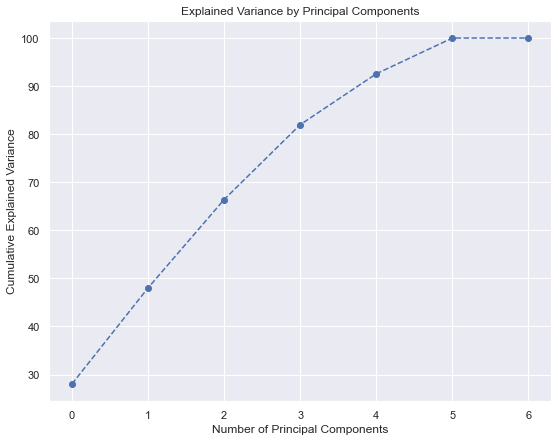

In [36]:
plt.subplots(figsize=(9, 7))
plt.plot(range(0,7),(pca_case_one.explained_variance_ratio_*100).cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80% of the variance. So, in this instance, we decide to keep 3 components.

##### Correlation circles visualization

By executing the function display_circles() we obtain the correlation circles.

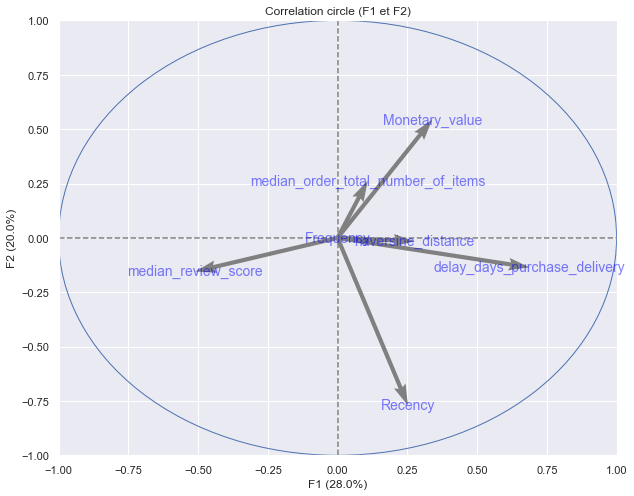

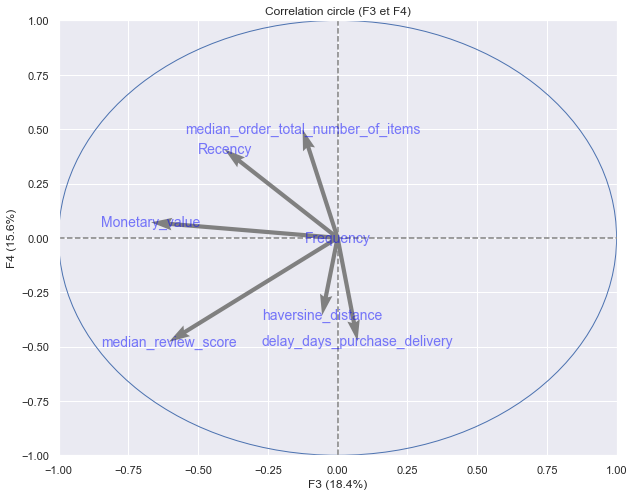

In [37]:
# Code extracted from OP example
# Cercle des corrélations
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
components_pca = pca_case_one.components_
display_circles(components_pca, 7, pca_case_one, [(0,1),(2,3)], labels = np.array(features))

##### Projected data visualization

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


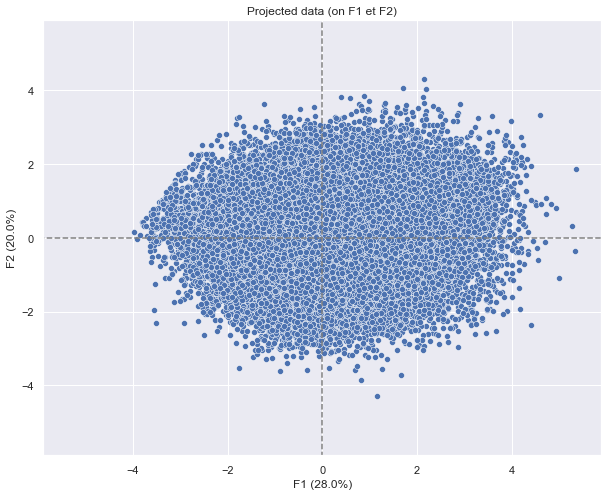

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


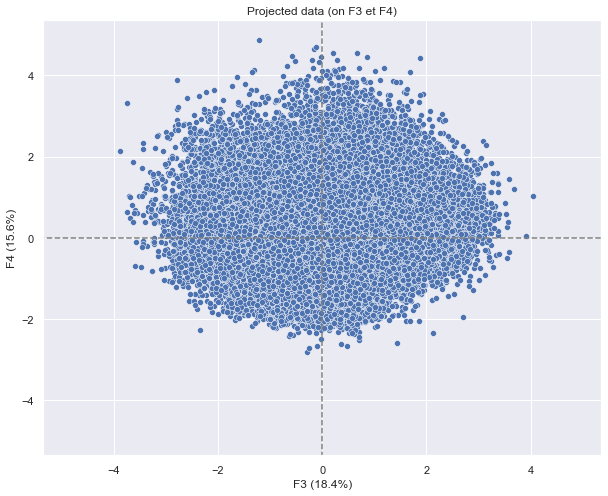

In [122]:
# Code extracted from OP example
# Projection des individus
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
X_projected = pca_result_case_one
display_factorial_planes(X_projected, 7, pca_case_one, [(0,1),(2,3)])

##### Projected data visualization by customer segment name

For a better visualization we are going to add some colors by label to the prjected data on the principal components.

In [39]:
df_for_PCA_case_one['F1'] = pca_result_case_one[:,0]
df_for_PCA_case_one['F2'] = pca_result_case_one[:,1]
df_for_PCA_case_one['F3'] = pca_result_case_one[:,2]
df_for_PCA_case_one['F4'] = pca_result_case_one[:,3]

In [40]:
df_for_PCA_case_one.head()

median_review_score  median_order_total_number_of_items  \
0             0.660494                           -0.314543   
1            -0.119534                           -0.314543   
2            -0.899562                           -0.314543   
3            -0.119534                           -0.314543   
4             0.660494                           -0.314543   

   delay_days_purchase_delivery  haversine_distance      Segment_name  \
0                     -0.731098           -0.470234    About To Sleep   
1                     -1.724060           -0.514157    About To Sleep   
2                      1.401335           -0.838033  Recent customers   
3                      1.018144            1.790624  Recent customers   
4                      0.390129           -0.677719  Recent customers   

   Frequency  Monetary_value   Recency        F1        F2        F3        F4  
0   -0.17879        0.346429 -0.830536 -1.108528  0.773868 -0.292504 -0.196296  
1   -0.17879       -1.666547 -0.810913 -2.083320 -0.079585  1.448198  0.527800  
2   -0.17879       -0.262229  1.955978  1.548995 -1.745651  0.102286  0.758992  
3   -0.17879       -1.075013  0.543098  0.980370 -1.208029  0.572791 -1.002292  
4   -0.17879        0.743898  0.327241  0.032088 -0.050706 -0.935159 -0.155003

Text(0.5, 1.0, 'PCA analysis')

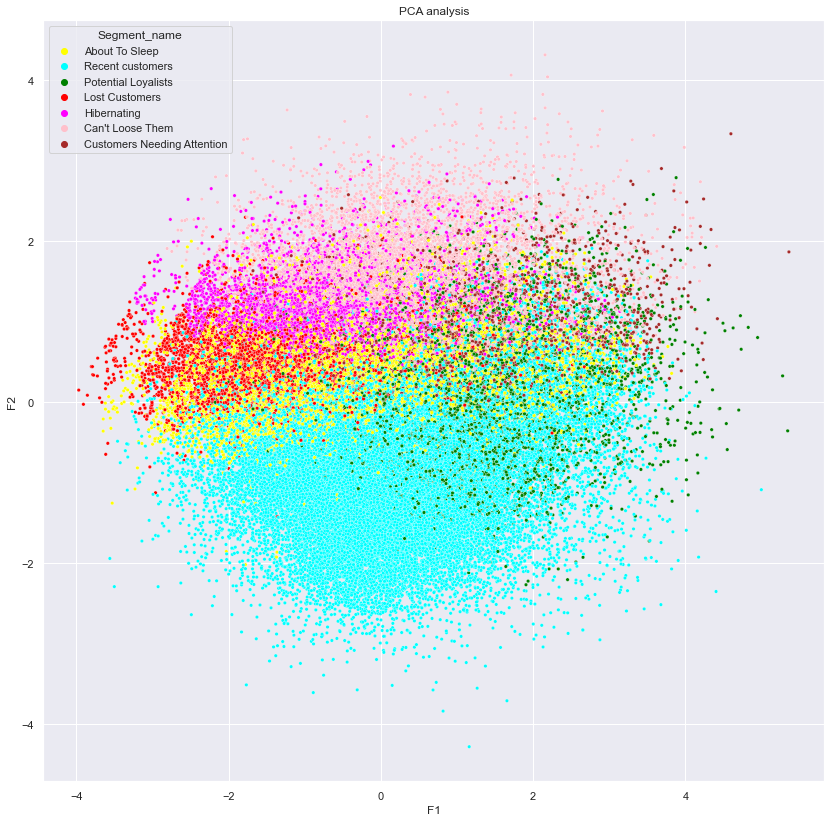

In [41]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F1", y="F2", hue="Segment_name", data=df_for_PCA_case_one, palette=my_pal, s=12)
plt.title('PCA analysis')

Text(0.5, 1.0, 'PCA analysis')

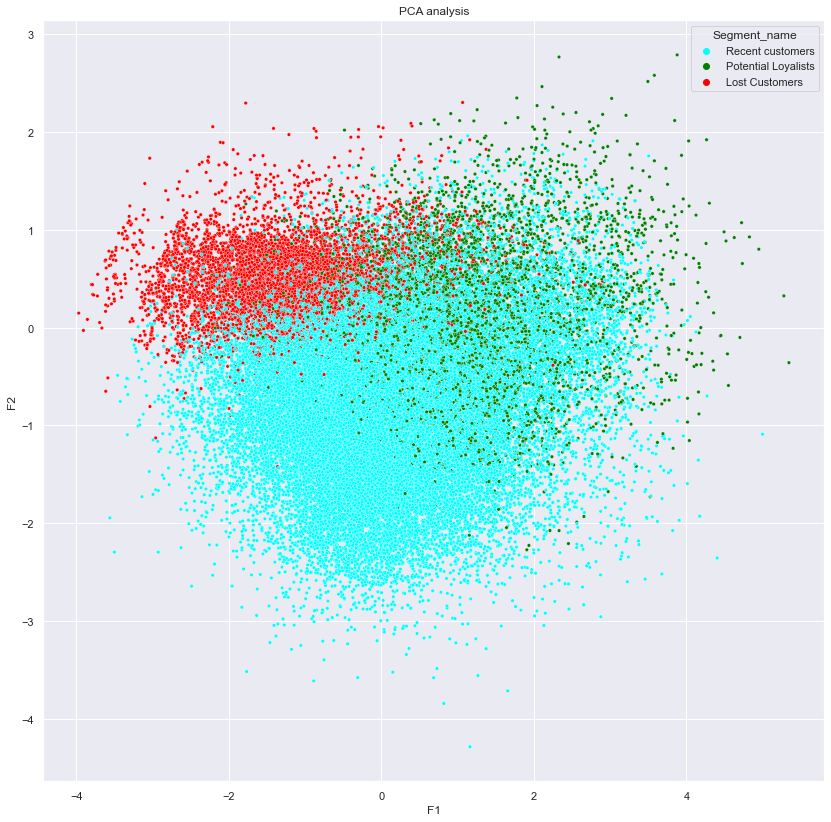

In [42]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F1", y="F2", hue="Segment_name", 
                data=df_for_PCA_case_one.loc[df_for_PCA_case_one['Segment_name'].isin(['Lost Customers', 
                                                                                        'Potential Loyalists',
                                                                                        'Recent customers'])], 
                palette=my_pal, s=12)
plt.title('PCA analysis')

Text(0.5, 1.0, 'PCA analysis')

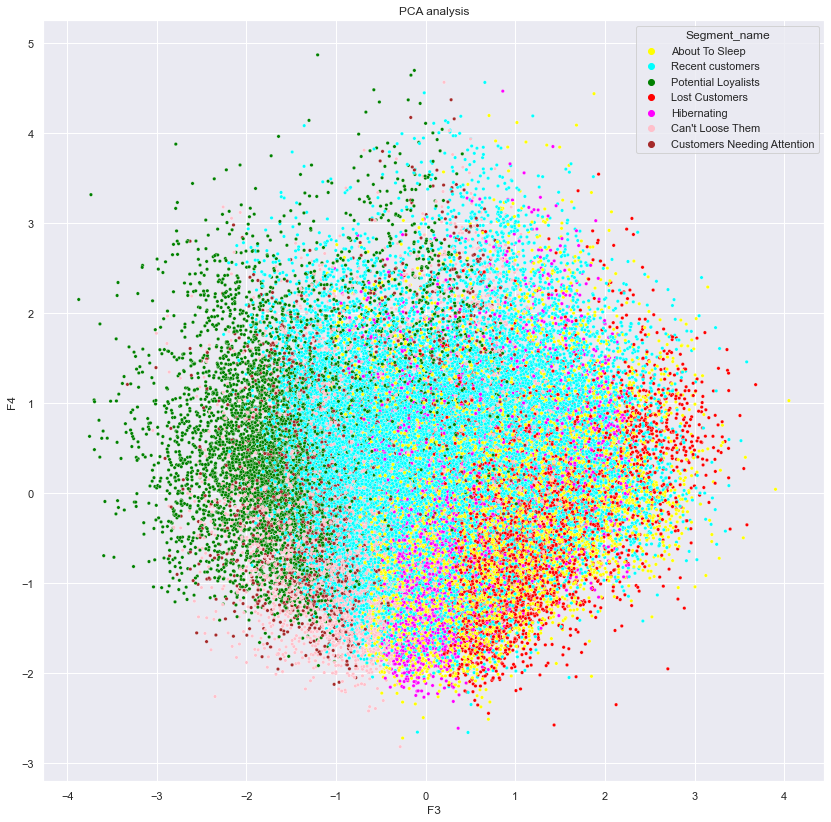

In [43]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F3", y="F4", hue="Segment_name", data=df_for_PCA_case_one, palette=my_pal, s=12)
plt.title('PCA analysis')

#### Case 2: We keep the median of product type per customer features

In the second case, we will explore the quality of clusters by keeping the median of product type per customer features and by eliminating the product_category_name_english. In the second case we will have a larger number of features and we will see the impact on the principal components.

In [44]:
df_for_PCA_case_two = df_standardized_without_outliers.copy()

In [45]:
df_for_PCA_case_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85622 entries, 0 to 91229
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   median_review_score                             85622 non-null  float64
 1   median_order_total_number_of_items              85622 non-null  float64
 2   median_appliances_products_per_customer         85622 non-null  float64
 3   median_of_arts_products_per_customer            85622 non-null  float64
 4   median_of_auto_products_per_customer            85622 non-null  float64
 5   median_of_construction_products_per_customer    85622 non-null  float64
 6   median_of_electronics_products_per_customer     85622 non-null  float64
 7   median_of_fashion_products_per_customer         85622 non-null  float64
 8   median_of_food_drinks_products_per_customer     85622 non-null  float64
 9   median_of_garden_pets_products_per_cust

In [46]:
df_for_PCA_case_two.columns

Index(['median_review_score', 'median_order_total_number_of_items',
       'median_appliances_products_per_customer',
       'median_of_arts_products_per_customer',
       'median_of_auto_products_per_customer',
       'median_of_construction_products_per_customer',
       'median_of_electronics_products_per_customer',
       'median_of_fashion_products_per_customer',
       'median_of_food_drinks_products_per_customer',
       'median_of_garden_pets_products_per_customer',
       'median_of_health_beauty_products_per_customer',
       'median_of_home_products_per_customer',
       'median_of_office_products_per_customer',
       'median_of_other_products_per_customer',
       'median_of_sports_leisure_products_per_customer',
       'delay_days_purchase_delivery', 'haversine_distance', 'Segment_name',
       'Frequency', 'Monetary_value', 'Recency'],
      dtype='object')

In [47]:
df_for_PCA_case_two = df_for_PCA_case_two.drop(columns=[
                                                        'median_review_score', 
                                                        'median_order_total_number_of_items',
                                                        'delay_days_purchase_delivery', 'olist_office_customer_distance', 
                                                        'Frequency', 'Monetary_value', 'Recency'])

In [48]:
df_for_PCA_case_two.shape

(85622, 14)

In [49]:
features = df_for_PCA_case_two.drop(columns=['Segment_name']).columns
names = df_for_PCA_case_two.drop(columns=['Segment_name']).index


# PCA
pca_case_two = PCA(n_components=13) # We start with the total number of features
pca_result_case_two = pca_case_two.fit_transform(df_for_PCA_case_two.drop(columns=['Segment_name']).values)
pca_result_case_two

array([[-1.97232988e+00, -8.86325123e-02, -4.59909319e-01, ...,
        -3.17109551e-03, -3.46793746e-02, -4.79717023e-03],
       [ 9.05223529e-01,  1.96706173e+00, -1.24918204e+00, ...,
        -3.25325713e-02, -6.21741174e-02, -5.25231282e-03],
       [ 2.56903135e-01,  2.99323143e-02,  7.40511265e-01, ...,
        -1.46036969e-01, -1.50735415e-01, -5.90337396e-03],
       ...,
       [ 9.05223529e-01,  1.96706173e+00, -1.24918204e+00, ...,
        -3.25325713e-02, -6.21741174e-02, -5.25231282e-03],
       [ 3.03107950e-01, -3.70488395e-03,  8.24225670e-01, ...,
        -6.24221139e-02, -1.59231964e-01, -3.19772142e-03],
       [ 4.08258362e-01,  3.41502489e-02,  1.99273729e+00, ...,
        -5.78564393e-02, -7.51458258e-02, -1.48740836e-03]])

In [50]:
pca_result_case_two.shape

(85622, 13)

In [51]:
(pca_case_two.explained_variance_ratio_ * 100).round(2)

array([9.67, 9.22, 8.77, 8.43, 8.27, 8.21, 8.16, 8.14, 8.06, 7.73, 7.7 ,
       7.59, 0.04])

According to the previous result, the first component alone captures only 9.57% of the variability in the dataset. Then the second component alone captures 6.41% of the variability in the dataset and so on. 

In [52]:
print("Variance explained by all 13 components = {:.2f}".format(sum(pca_case_two.explained_variance_ratio_ * 100)))

Variance explained by all 13 components = 100.00


Text(0, 0.5, 'Cumulative Explained Variance')

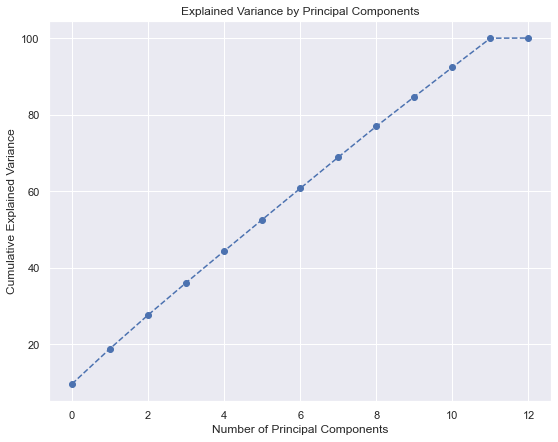

In [53]:
plt.subplots(figsize=(9, 7))
plt.plot(range(0,13),(pca_case_two.explained_variance_ratio_*100).cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

Again the graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 9 components.

By executing the function display_circles() we obtain the correlation circles.

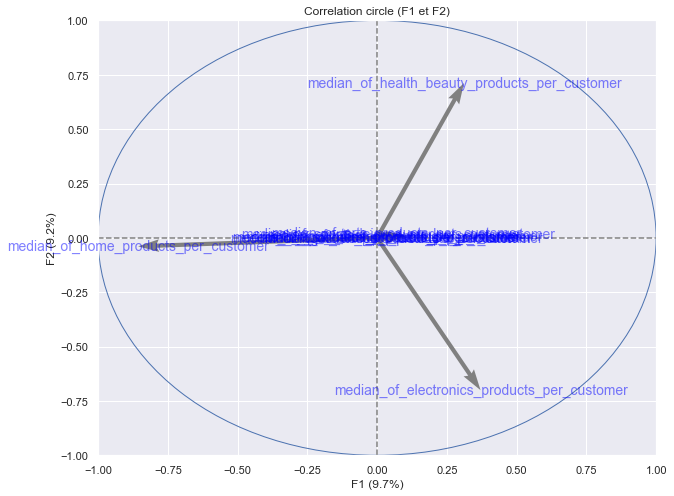

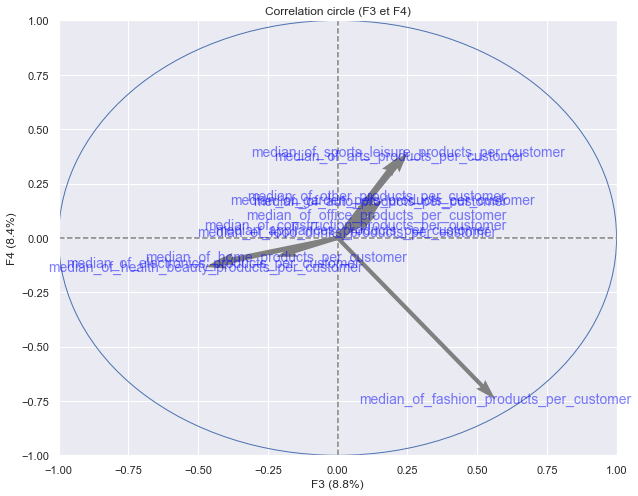

In [54]:
# Code extracted from OP example
# Cercle des corrélations
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
components_pca = pca_case_two.components_
display_circles(components_pca, 13, pca_case_two, [(0,1),(2,3)], labels = np.array(features))

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


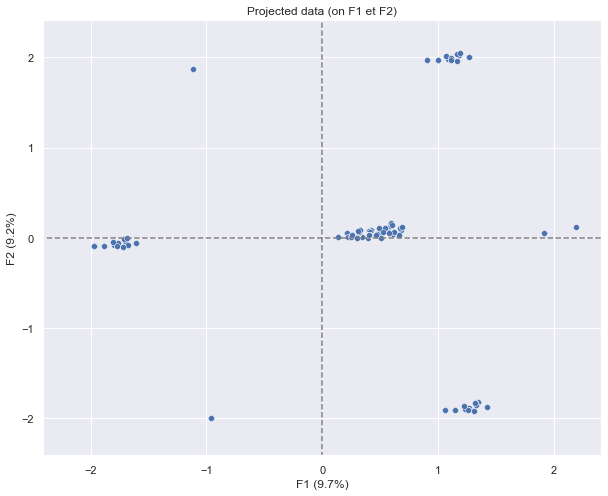

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


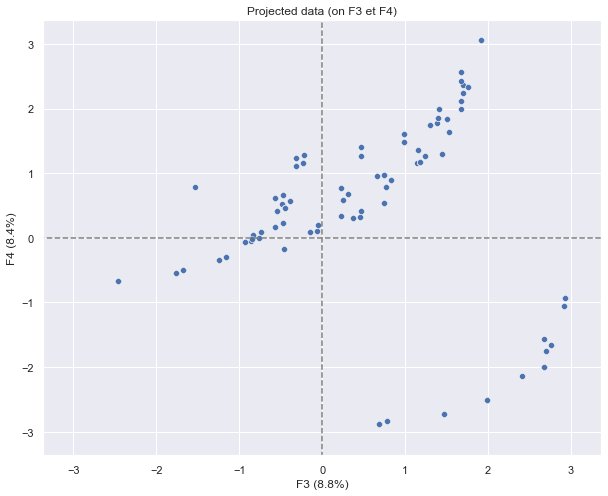

In [55]:
# Code extracted from OP example
# Projection des individus
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
X_projected = pca_result_case_two
display_factorial_planes(X_projected, 13, pca_case_two, [(0,1),(2,3)])

##### Projected data visualization by customer segment name

For a better visualization we are going to add some colors by label to the prjected data on the principal components.

In [56]:
df_for_PCA_case_two['F1'] = pca_result_case_two[:,0]
df_for_PCA_case_two['F2'] = pca_result_case_two[:,1]
df_for_PCA_case_two['F3'] = pca_result_case_two[:,2]
df_for_PCA_case_two['F4'] = pca_result_case_two[:,3]
df_for_PCA_case_two['F5'] = pca_result_case_two[:,4]
df_for_PCA_case_two['F6'] = pca_result_case_two[:,5]
df_for_PCA_case_two['F7'] = pca_result_case_two[:,6]
df_for_PCA_case_two['F8'] = pca_result_case_two[:,7]
df_for_PCA_case_two['F9'] = pca_result_case_two[:,8]
df_for_PCA_case_two['F10'] = pca_result_case_two[:,9]

In [57]:
df_for_PCA_case_two.head()

median_appliances_products_per_customer  \
0                                -0.132583   
1                                -0.132583   
2                                -0.132583   
3                                -0.132583   
4                                -0.132583   

   median_of_arts_products_per_customer  median_of_auto_products_per_customer  \
0                             -0.253775                             -0.206868   
1                             -0.253775                             -0.206868   
2                             -0.253775                             -0.206868   
3                             -0.253775                             -0.206868   
4                             -0.253775                             -0.206868   

   median_of_construction_products_per_customer  \
0                                      -0.15398   
1                                      -0.15398   
2                                      -0.15398   
3                                      -0.15398   
4                                      -0.15398   

   median_of_electronics_products_per_customer  \
0                                    -0.436790   
1                                    -0.436790   
2                                    -0.436790   
3                                     2.289405   
4                                     2.289405   

   median_of_fashion_products_per_customer  \
0                                -0.322525   
1                                -0.322525   
2                                -0.322525   
3                                -0.322525   
4                                -0.322525   

   median_of_food_drinks_products_per_customer  \
0                                    -0.101593   
1                                    -0.101593   
2                                    -0.101593   
3                                    -0.101593   
4                                    -0.101593   

   median_of_garden_pets_products_per_customer  \
0                                    -0.242626   
1                                    -0.242626   
2                                    -0.242626   
3                                    -0.242626   
4                                    -0.242626   

   median_of_health_beauty_products_per_customer  \
0                                      -0.429455   
1                                       2.328507   
2                                      -0.429455   
3                                      -0.429455   
4                                      -0.429455   

   median_of_home_products_per_customer  ...        F1        F2        F3  \
0                              1.801565  ... -1.972330 -0.088633 -0.459909   
1                             -0.555067  ...  0.905224  1.967062 -1.249182   
2                             -0.555067  ...  0.256903  0.029932  0.740511   
3                             -0.555067  ...  1.057352 -1.905985 -1.158265   
4                             -0.555067  ...  1.057352 -1.905985 -1.158265   

         F4        F5        F6        F7        F8        F9       F10  
0 -0.178656  0.008689 -0.076062  0.019377 -0.046567 -0.040620 -0.095692  
1 -0.342106 -0.007376 -0.097773 -0.019757 -0.033006 -0.052623 -0.096965  
2  0.543771  0.116587  0.437307 -0.339473  0.519087  4.610038 -0.397788  
3 -0.289733  0.014413 -0.127370  0.027651 -0.037898 -0.051492 -0.103514  
4 -0.289733  0.014413 -0.127370  0.027651 -0.037898 -0.051492 -0.103514  

[5 rows x 24 columns]

Text(0.5, 1.0, 'PCA analysis')

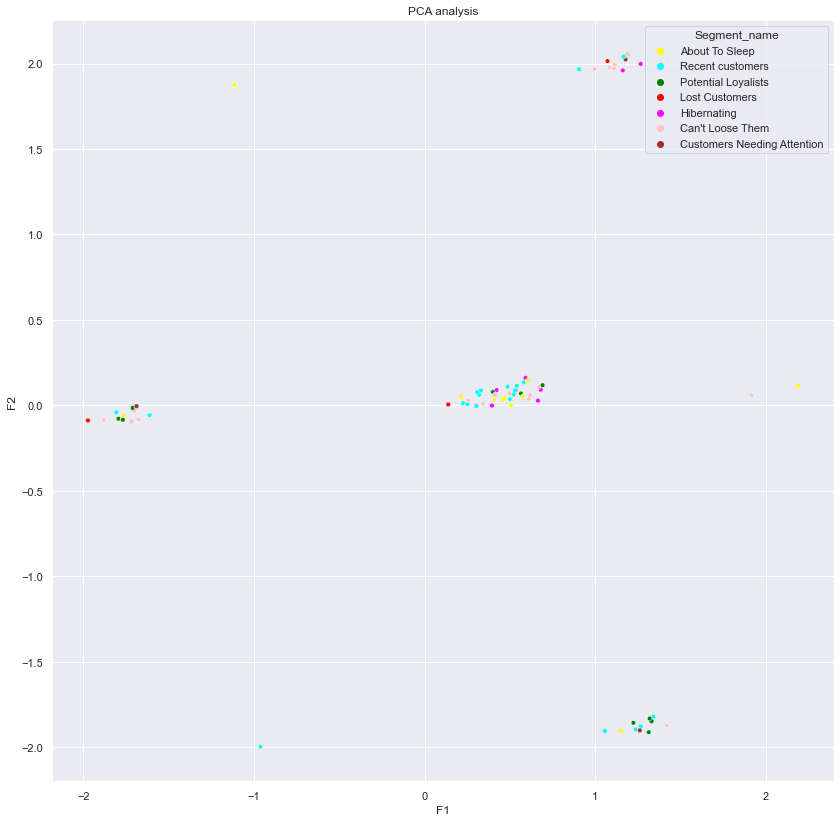

In [58]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F1", y="F2", hue="Segment_name", data=df_for_PCA_case_two, palette=my_pal, s=20)
plt.title('PCA analysis')

In [59]:
# plt.subplots(figsize=(14, 14))
# my_pal = {"Lost Customers":"red",
#            "Hibernating":"magenta",
#            "About To Sleep":"yellow",
#            "Can\'t Loose Them":"purple",
#            "At Risk":"deeppink",
#            "Customers Needing Attention":"brown",
#            "Recent customers":"cyan",
#            "Potential Loyalists":"green",
#            "Loyal Customers":"blue"}
# sns.scatterplot(x="F3", y="F4", hue="Segment_name", 
#                 data=df_for_PCA_case_two, 
#                 palette=my_pal, s=20)
# plt.title('PCA analysis')

## K-means clusterization

### Case one: result from PCA one

Visualization of the elbow method of our K-Means.

See reference: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [60]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [61]:
df_k_means_reduced_PCA_case_one = df_for_PCA_case_one.copy()

In [62]:
df_k_means_reduced_PCA_case_one.columns

Index(['median_review_score', 'median_order_total_number_of_items',
       'delay_days_purchase_delivery', 'haversine_distance', 'Segment_name',
       'Frequency', 'Monetary_value', 'Recency', 'F1', 'F2', 'F3', 'F4'],
      dtype='object')

#### Elbow method: determining the best K number of clusters

In [63]:
Sum_of_squared_distances_case_one = []
K = range(1,20) # Range of clusters to find the best fit
for k in K:
    k_means_result_case_one = KMeans(n_clusters=k)
    k_means_result_case_one = k_means_result_case_one.fit(df_k_means_reduced_PCA_case_one.drop(columns=['Segment_name', 'F1', 'F2', 'F3', 'F4']).values)
    Sum_of_squared_distances_case_one.append(k_means_result_case_one.inertia_)

In [64]:
df_k_means_reduced_PCA_case_one.drop(columns=['Segment_name', 'F1', 'F2', 'F3', 'F4']).values

array([[ 0.66049446, -0.31454345, -0.73109795, ..., -0.17879045,
         0.34642894, -0.83053642],
       [-0.11953376, -0.31454345, -1.72405956, ..., -0.17879045,
        -1.66654732, -0.81091308],
       [-0.89956199, -0.31454345,  1.40133469, ..., -0.17879045,
        -0.26222904,  1.95597813],
       ...,
       [-0.11953376, -0.31454345,  1.61050746, ..., -0.17879045,
        -0.27642118,  0.15717179],
       [ 0.66049446, -0.31454345,  0.59855794, ..., -0.17879045,
         0.05834362,  2.15875267],
       [ 0.66049446, -0.31454345,  0.27364333, ..., -0.17879045,
         0.2760351 , -0.77820751]])

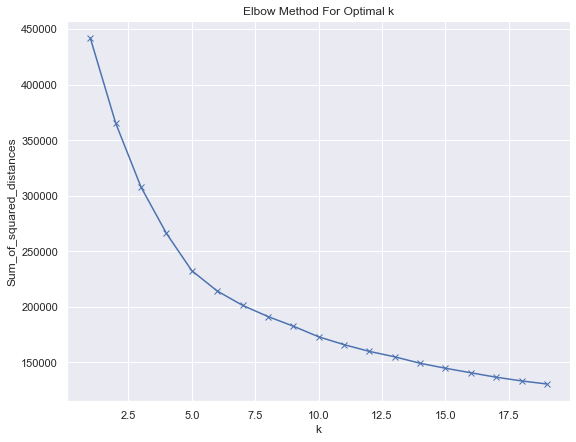

In [65]:
plt.subplots(figsize=(9, 7))
plt.plot(K, Sum_of_squared_distances_case_one, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As the number of clusters increases, the variance (within-cluster sum of squares) decreases. Hence there is a point when the decrease os thr sum of squared distances is not significant for increasing k-cluster value. That’s how we get the optimal value of k.

In [66]:
clusterer_case_one = KMeans(n_clusters=5, init="random", random_state=42)

#Predict the labels of clusters
cluster_labels_case_one = clusterer_case_one.fit_predict(df_k_means_reduced_PCA_case_one.drop(columns=['Segment_name', 'F1', 'F2', 'F3', 'F4']).values)

In [67]:
df_k_means_reduced_PCA_case_one['Segment_k_means_label'] = clusterer_case_one.labels_

In [68]:
df_k_means_reduced_PCA_case_one.head()

median_review_score  median_order_total_number_of_items  \
0             0.660494                           -0.314543   
1            -0.119534                           -0.314543   
2            -0.899562                           -0.314543   
3            -0.119534                           -0.314543   
4             0.660494                           -0.314543   

   delay_days_purchase_delivery  haversine_distance      Segment_name  \
0                     -0.731098           -0.470234    About To Sleep   
1                     -1.724060           -0.514157    About To Sleep   
2                      1.401335           -0.838033  Recent customers   
3                      1.018144            1.790624  Recent customers   
4                      0.390129           -0.677719  Recent customers   

   Frequency  Monetary_value   Recency        F1        F2        F3  \
0   -0.17879        0.346429 -0.830536 -1.108528  0.773868 -0.292504   
1   -0.17879       -1.666547 -0.810913 -2.083320 -0.079585  1.448198   
2   -0.17879       -0.262229  1.955978  1.548995 -1.745651  0.102286   
3   -0.17879       -1.075013  0.543098  0.980370 -1.208029  0.572791   
4   -0.17879        0.743898  0.327241  0.032088 -0.050706 -0.935159   

         F4  Segment_k_means_label  
0 -0.196296                      3  
1  0.527800                      3  
2  0.758992                      1  
3 -1.002292                      1  
4 -0.155003                      2

In [69]:
#Getting the Centroids of the clusters
centroids_case_one = clusterer_case_one.cluster_centers_
unique_labels_case_one = np.unique(cluster_labels_case_one)

In [70]:
centroids_case_one

array([[-3.52583265e-01,  2.48795958e+00, -1.09585288e-01,
         5.38054238e-02, -1.78790452e-01,  5.59396806e-01,
         1.29497502e-03],
       [ 3.49440699e-01, -3.13958974e-01,  3.69973566e-02,
         5.62969958e-02, -1.78790452e-01, -3.18416147e-01,
         1.13409660e+00],
       [ 3.85613926e-01, -3.14543451e-01,  4.77011344e-01,
         4.49245851e-01, -1.78790452e-01,  6.49739453e-01,
        -3.82907972e-01],
       [ 3.66393249e-01, -3.10404971e-01, -8.84467288e-01,
        -2.66522025e-01, -1.78790452e-01, -5.56138247e-01,
        -7.29544263e-01],
       [-1.99416404e+00, -2.74321727e-01,  9.04793747e-01,
         2.73945416e-01, -1.78790452e-01, -1.09515285e-02,
        -1.91144968e-03]])

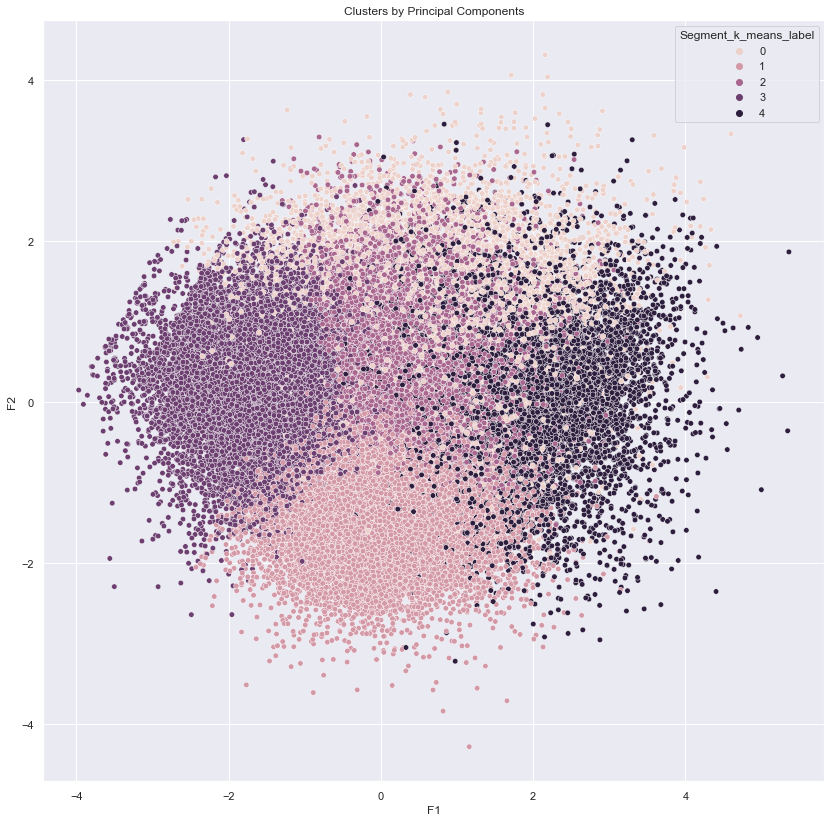

In [71]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_k_means_reduced_PCA_case_one['F1'], y = df_k_means_reduced_PCA_case_one['F2'], hue = df_k_means_reduced_PCA_case_one['Segment_k_means_label'], s = 30)
plt.title('Clusters by Principal Components')
plt.show()

In [72]:
df_k_means_reduced_PCA_case_one['Segment_k_means_label'].unique()

array([3, 1, 2, 4, 0])

In [73]:
df_k_means_reduced_PCA_case_one['Segment_name'].unique()

array(['About To Sleep', 'Recent customers', 'Potential Loyalists',
       'Lost Customers', 'Hibernating', "Can't Loose Them",
       'Customers Needing Attention'], dtype=object)

* **Potential Loyalists:** Recent customers with average frequency.
* **Recent Customers:** Bought most recently, but not often.
* **Customers Needing Attention:** Above average recency, frequency and monetary values. May not have bought very recently though.
* **Can't Lose Them:** Used to purchase frequently but haven't returned for a long time.
* **Lost Customers:** Purchased long time ago and never came back.

In [74]:
df_k_means_reduced_PCA_case_one['Segment_client_k_means'] = df_k_means_reduced_PCA_case_one['Segment_k_means_label'].map(
            {
                0: 'Can\'t Loose Them',
                1: 'Customers Needing Attention', 
                2: 'Potential Loyalists'
                3: 'Lost Customers', 
                4: 'Recent customers', 
            }
)
df_k_means_reduced_PCA_case_one.head()

median_review_score  median_order_total_number_of_items  \
0             0.660494                           -0.314543   
1            -0.119534                           -0.314543   
2            -0.899562                           -0.314543   
3            -0.119534                           -0.314543   
4             0.660494                           -0.314543   

   delay_days_purchase_delivery  haversine_distance      Segment_name  \
0                     -0.731098           -0.470234    About To Sleep   
1                     -1.724060           -0.514157    About To Sleep   
2                      1.401335           -0.838033  Recent customers   
3                      1.018144            1.790624  Recent customers   
4                      0.390129           -0.677719  Recent customers   

   Frequency  Monetary_value   Recency        F1        F2        F3  \
0   -0.17879        0.346429 -0.830536 -1.108528  0.773868 -0.292504   
1   -0.17879       -1.666547 -0.810913 -2.083320 -0.079585  1.448198   
2   -0.17879       -0.262229  1.955978  1.548995 -1.745651  0.102286   
3   -0.17879       -1.075013  0.543098  0.980370 -1.208029  0.572791   
4   -0.17879        0.743898  0.327241  0.032088 -0.050706 -0.935159   

         F4  Segment_k_means_label       Segment_client_k_means  
0 -0.196296                      3               Lost Customers  
1  0.527800                      3               Lost Customers  
2  0.758992                      1  Customers Needing Attention  
3 -1.002292                      1  Customers Needing Attention  
4 -0.155003                      2          Potential Loyalists

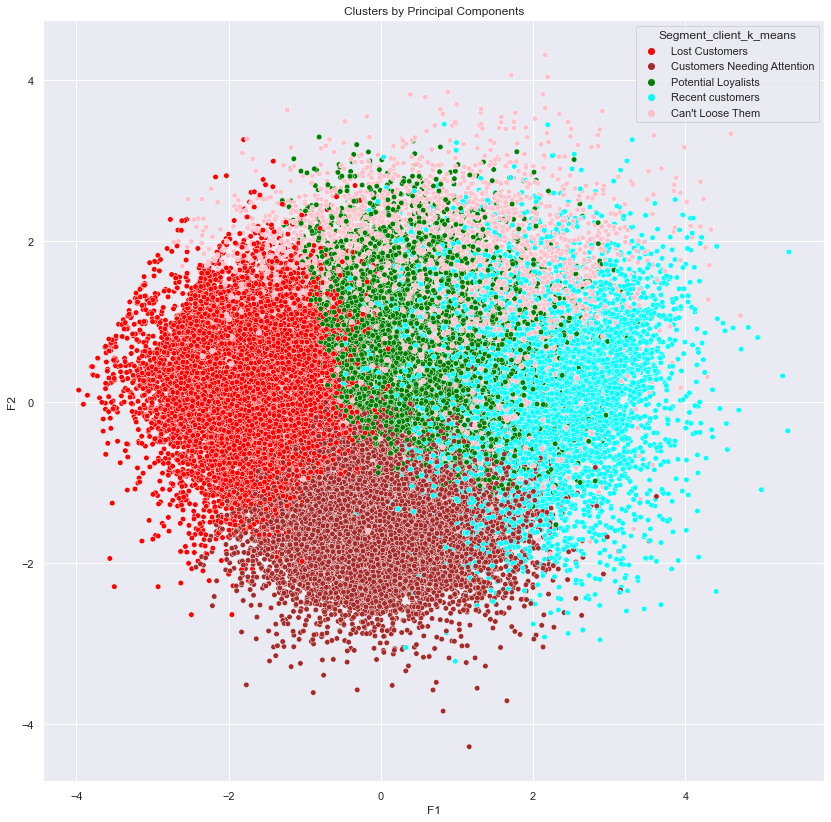

In [75]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Can\'t Loose Them":"pink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green"}
sns.scatterplot(x = df_k_means_reduced_PCA_case_one['F1'], y = df_k_means_reduced_PCA_case_one['F2'], hue = df_k_means_reduced_PCA_case_one['Segment_client_k_means'], palette=my_pal, s = 30)
plt.title('Clusters by Principal Components')
plt.show()

### Case two: result from PCA two

In [76]:
df_k_means_reduced_PCA_case_two = df_for_PCA_case_two.copy()

In [77]:
df_k_means_reduced_PCA_case_two.columns

Index(['median_appliances_products_per_customer',
       'median_of_arts_products_per_customer',
       'median_of_auto_products_per_customer',
       'median_of_construction_products_per_customer',
       'median_of_electronics_products_per_customer',
       'median_of_fashion_products_per_customer',
       'median_of_food_drinks_products_per_customer',
       'median_of_garden_pets_products_per_customer',
       'median_of_health_beauty_products_per_customer',
       'median_of_home_products_per_customer',
       'median_of_office_products_per_customer',
       'median_of_other_products_per_customer',
       'median_of_sports_leisure_products_per_customer', 'Segment_name', 'F1',
       'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10'],
      dtype='object')

In [78]:
# df_k_means_reduced_PCA_case_two = df_k_means_reduced_PCA_case_two.drop(columns=[])

#### Elbow method: determining the best K number of clusters

In [79]:
Sum_of_squared_distances_case_two = []
K = range(1,30) # Range of clusters to find the best fit
for k in K:
    k_means_result_case_two = KMeans(n_clusters=k)
    k_means_result_case_two = k_means_result_case_two.fit(pca_result_case_two)
    Sum_of_squared_distances_case_two.append(k_means_result_case_two.inertia_)

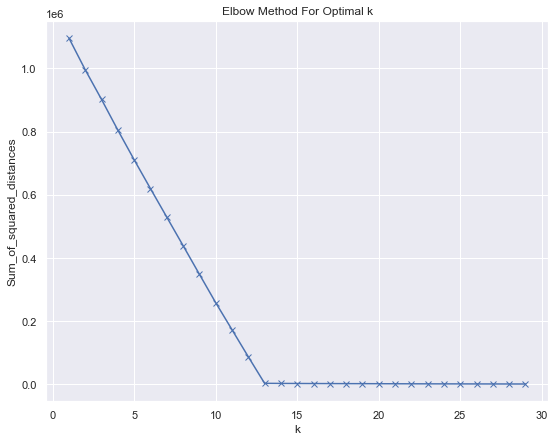

In [80]:
plt.subplots(figsize=(9, 7))
plt.plot(K, Sum_of_squared_distances_case_two, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [113]:
clusterer_case_two = KMeans(n_clusters=13, init="random", random_state=42)

#Predict the labels of clusters
cluster_labels_case_two = clusterer_case_two.fit_predict(pca_result_case_two)

In [114]:
df_k_means_reduced_PCA_case_two['Segment_k_means_label'] = clusterer_case_two.labels_

In [115]:
df_k_means_reduced_PCA_case_two.head()

median_appliances_products_per_customer  \
0                                -0.132583   
1                                -0.132583   
2                                -0.132583   
3                                -0.132583   
4                                -0.132583   

   median_of_arts_products_per_customer  median_of_auto_products_per_customer  \
0                             -0.253775                             -0.206868   
1                             -0.253775                             -0.206868   
2                             -0.253775                             -0.206868   
3                             -0.253775                             -0.206868   
4                             -0.253775                             -0.206868   

   median_of_construction_products_per_customer  \
0                                      -0.15398   
1                                      -0.15398   
2                                      -0.15398   
3                                      -0.15398   
4                                      -0.15398   

   median_of_electronics_products_per_customer  \
0                                    -0.436790   
1                                    -0.436790   
2                                    -0.436790   
3                                     2.289405   
4                                     2.289405   

   median_of_fashion_products_per_customer  \
0                                -0.322525   
1                                -0.322525   
2                                -0.322525   
3                                -0.322525   
4                                -0.322525   

   median_of_food_drinks_products_per_customer  \
0                                    -0.101593   
1                                    -0.101593   
2                                    -0.101593   
3                                    -0.101593   
4                                    -0.101593   

   median_of_garden_pets_products_per_customer  \
0                                    -0.242626   
1                                    -0.242626   
2                                    -0.242626   
3                                    -0.242626   
4                                    -0.242626   

   median_of_health_beauty_products_per_customer  \
0                                      -0.429455   
1                                       2.328507   
2                                      -0.429455   
3                                      -0.429455   
4                                      -0.429455   

   median_of_home_products_per_customer  ...        F2        F3        F4  \
0                              1.801565  ... -0.088633 -0.459909 -0.178656   
1                             -0.555067  ...  1.967062 -1.249182 -0.342106   
2                             -0.555067  ...  0.029932  0.740511  0.543771   
3                             -0.555067  ... -1.905985 -1.158265 -0.289733   
4                             -0.555067  ... -1.905985 -1.158265 -0.289733   

         F5        F6        F7        F8        F9       F10  \
0  0.008689 -0.076062  0.019377 -0.046567 -0.040620 -0.095692   
1 -0.007376 -0.097773 -0.019757 -0.033006 -0.052623 -0.096965   
2  0.116587  0.437307 -0.339473  0.519087  4.610038 -0.397788   
3  0.014413 -0.127370  0.027651 -0.037898 -0.051492 -0.103514   
4  0.014413 -0.127370  0.027651 -0.037898 -0.051492 -0.103514   

   Segment_k_means_label  
0                      6  
1                      5  
2                      8  
3                      6  
4                      6  

[5 rows x 25 columns]

In [116]:
df_k_means_reduced_PCA_case_two['Segment_k_means_label'].unique()

array([ 6,  5,  8,  0,  1,  9, 11,  2, 10,  7,  3,  4, 12])

In [117]:
#Getting the Centroids of the clusters
centroids_case_two = clusterer_case_two.cluster_centers_
unique_labels_case_two = np.unique(cluster_labels_case_two)

In [118]:
centroids_case_two[:3]

array([[ 2.43307297e-01,  4.49417802e-03,  7.59396020e-01,
         7.82704610e-01, -1.55315226e-01,  1.42061853e+00,
        -1.36292178e+00,  3.34851250e+00, -1.09991497e+00,
        -7.03626655e-01,  1.09319232e-01, -1.07165458e-01,
         6.58165988e-04],
       [ 4.09593956e-01,  3.31891495e-02,  1.98856205e+00,
        -2.51457424e+00,  5.40627998e-02, -3.23727285e-01,
         1.08567552e-01, -1.18587536e-01, -2.27308069e-01,
        -1.75871325e-01, -5.79836294e-02, -7.53744728e-02,
         2.52559805e-03],
       [ 3.03847180e-01, -8.03263192e-03,  8.22880615e-01,
         8.87750128e-01, -2.89856995e-01,  2.51604613e+00,
        -2.53695066e+00, -3.08677819e+00, -5.69428674e-01,
        -4.00278067e-01, -6.26657047e-02, -1.59823564e-01,
         4.36005151e-03]])

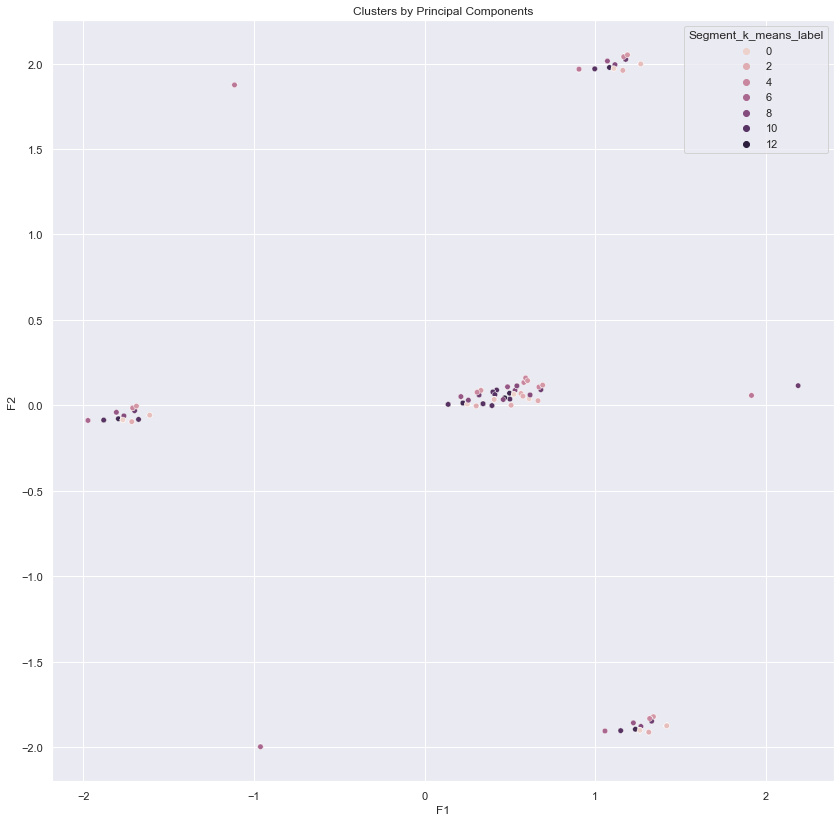

In [119]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"purple",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x = df_k_means_reduced_PCA_case_two['F1'], y = df_k_means_reduced_PCA_case_two['F2'], hue = df_k_means_reduced_PCA_case_two['Segment_k_means_label'], s = 30)
plt.title('Clusters by Principal Components')
plt.show()

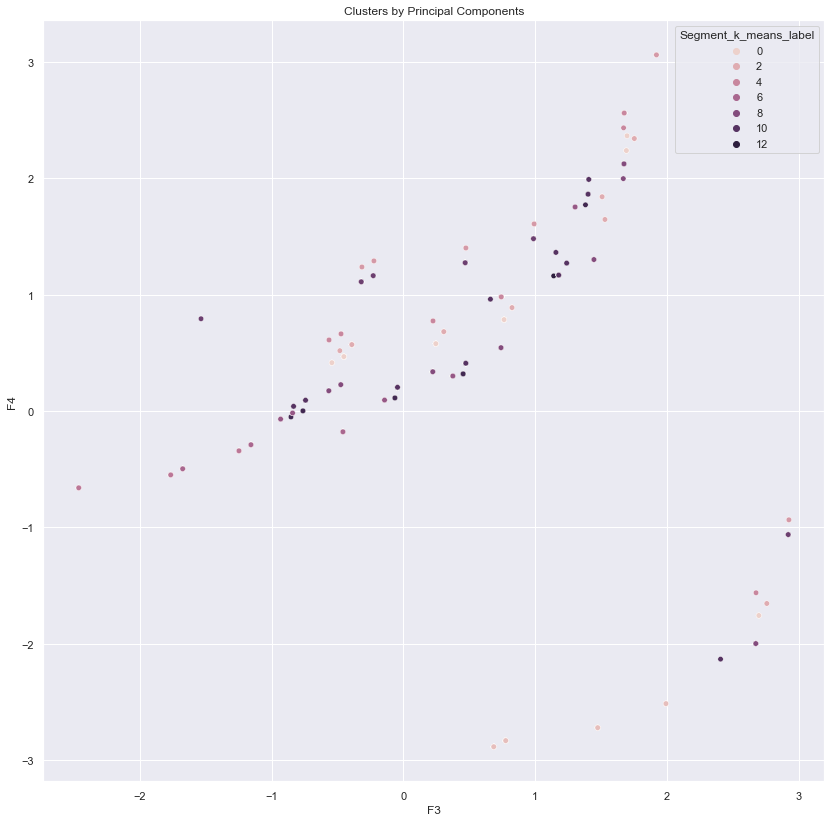

In [120]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"purple",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x = df_k_means_reduced_PCA_case_two['F3'], y = df_k_means_reduced_PCA_case_two['F4'], hue = df_k_means_reduced_PCA_case_two['Segment_k_means_label'], s = 30)
plt.title('Clusters by Principal Components')
plt.show()

In [89]:
# plt.subplots(figsize=(14, 14))
# my_pal = {"Lost Customers":"red",
#            "Hibernating":"magenta",
#            "About To Sleep":"yellow",
#            "Can\'t Loose Them":"purple",
#            "At Risk":"deeppink",
#            "Customers Needing Attention":"brown",
#            "Recent customers":"cyan",
#            "Potential Loyalists":"green",
#            "Loyal Customers":"blue"}
# sns.scatterplot(x = df_k_means_reduced_PCA_case_two['F5'], y = df_k_means_reduced_PCA_case_two['F6'], hue = df_k_means_reduced_PCA_case_two['Segment_k_means_label'], s = 30)
# plt.title('Clusters by Principal Components')
# plt.show()

### TSNE TEST

In [90]:
#TSNE 

from sklearn.manifold import TSNE


In [95]:
df_k_means_reduced_PCA_case_one.drop(columns=['Segment_name', 'F1', 'F2', 'F3', 'F4','Segment_client_k_means', 'Segment_k_means_label']).head()

median_review_score  median_order_total_number_of_items  \
0             0.660494                           -0.314543   
1            -0.119534                           -0.314543   
2            -0.899562                           -0.314543   
3            -0.119534                           -0.314543   
4             0.660494                           -0.314543   

   delay_days_purchase_delivery  haversine_distance  Frequency  \
0                     -0.731098           -0.470234   -0.17879   
1                     -1.724060           -0.514157   -0.17879   
2                      1.401335           -0.838033   -0.17879   
3                      1.018144            1.790624   -0.17879   
4                      0.390129           -0.677719   -0.17879   

   Monetary_value   Recency  
0        0.346429 -0.830536  
1       -1.666547 -0.810913  
2       -0.262229  1.955978  
3       -1.075013  0.543098  
4        0.743898  0.327241

In [111]:
tsne = TSNE(verbose=1, random_state=123, perplexity=70)
z = tsne.fit_transform(df_k_means_reduced_PCA_case_one[:1000].drop(columns=['Segment_name', 'F1', 'F2', 'F3', 'F4','Segment_client_k_means', 'Segment_k_means_label']).values) 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.087s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.785746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.372894
[t-SNE] KL divergence after 1000 iterations: 0.892907


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

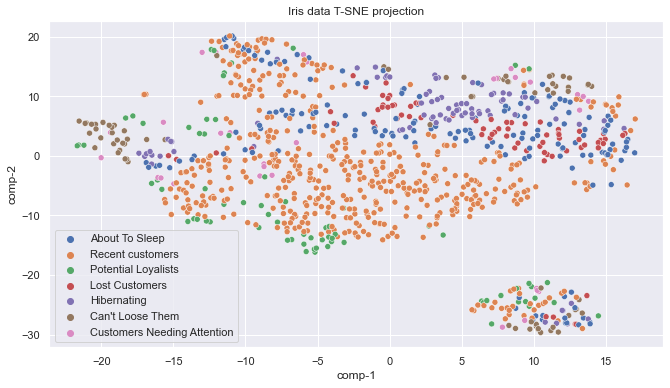

In [112]:
df = pd.DataFrame()
df["y"] = df_k_means_reduced_PCA_case_one['Segment_name'][:1000]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                # palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection")